In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle

In [4]:
df=pd.read_csv('C:/Users/Admin/OneDrive/Desktop/EDUCATION\DATA SET_DATATRAINED/Grades.csv')
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [5]:
df.shape

(571, 43)

In [6]:
df.columns


Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [7]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

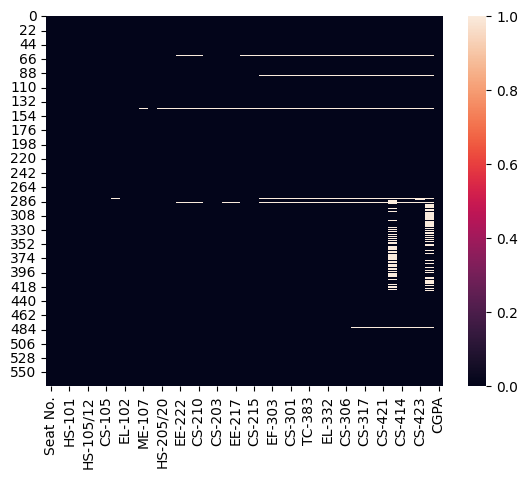

In [8]:
sns.heatmap(data=df.isnull())
plt.show()

In [9]:
df= df.fillna(df.mode().iloc[0])

In [10]:
for column in df.columns:
    un=df[column].unique() 
    print(column,un.size)

Seat No. 571
PH-121 13
HS-101 12
CY-105 13
HS-105/12 13
MT-111 13
CS-105 11
CS-106 13
EL-102 13
EE-119 12
ME-107 13
CS-107 14
HS-205/20 13
MT-222 14
EE-222 13
MT-224 14
CS-210 14
CS-211 14
CS-203 13
CS-214 13
EE-217 13
CS-212 12
CS-215 14
MT-331 12
EF-303 12
HS-304 14
CS-301 12
CS-302 11
TC-383 12
MT-442 12
EL-332 13
CS-318 14
CS-306 13
CS-312 14
CS-317 12
CS-403 11
CS-421 13
CS-406 14
CS-414 13
CS-419 12
CS-423 12
CS-412 13
CGPA 491


In [11]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [12]:
Greades=df.drop(columns='Seat No.')
Greades.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


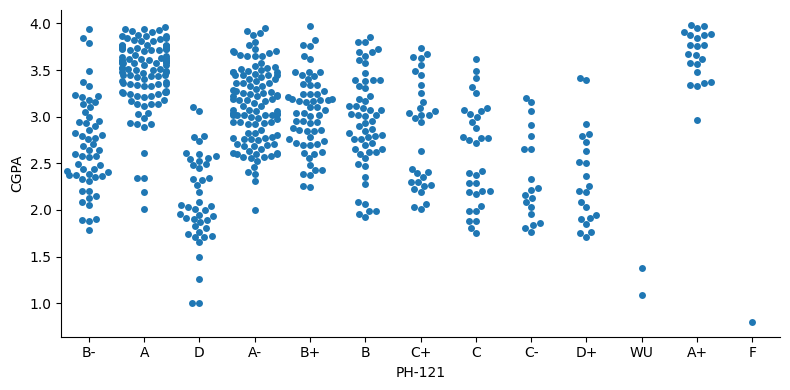

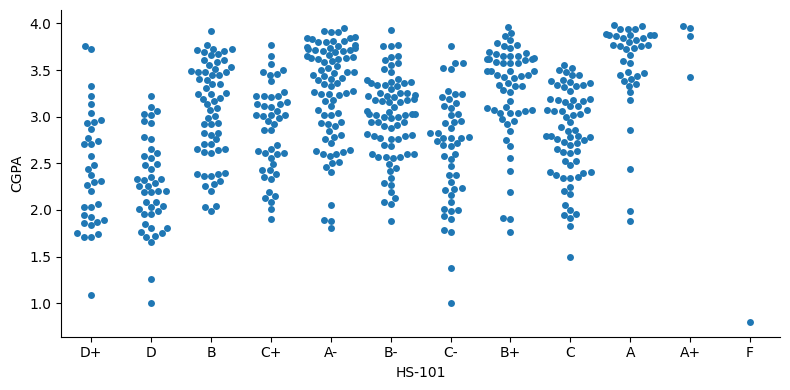

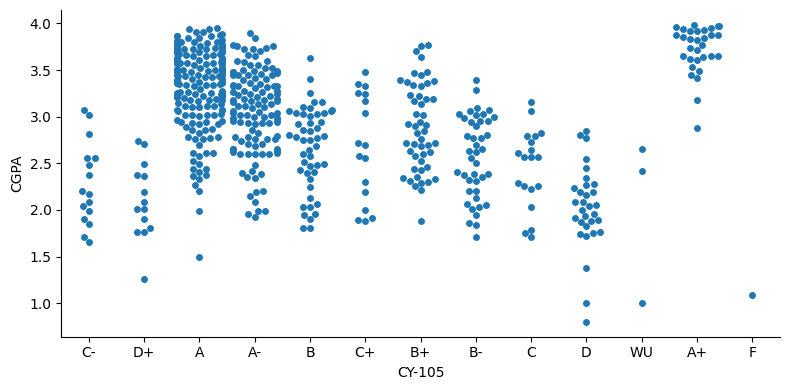

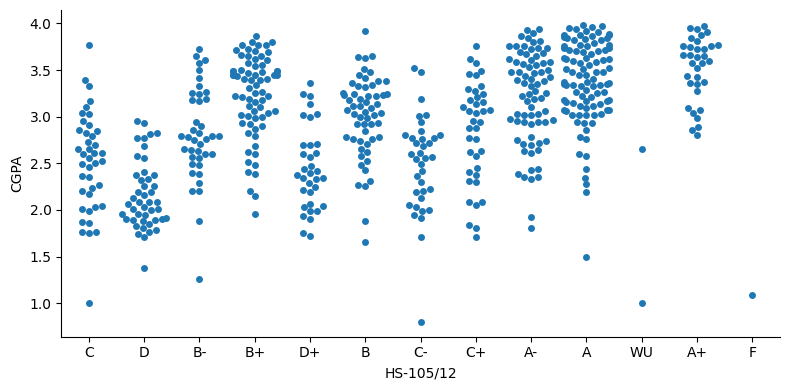

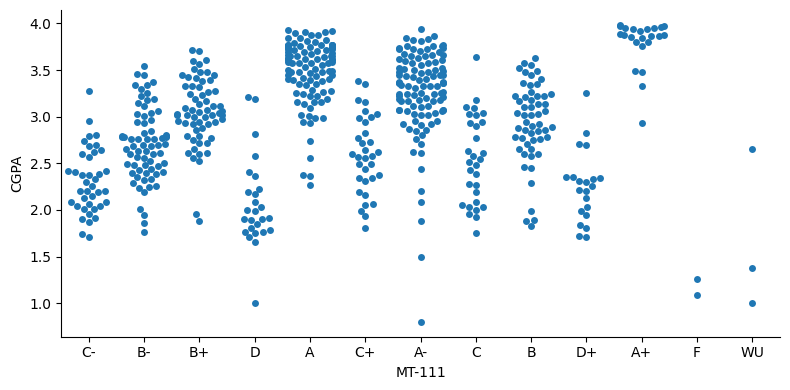

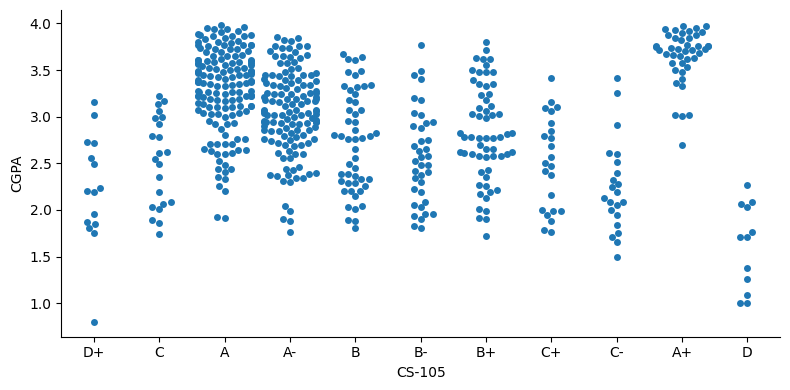

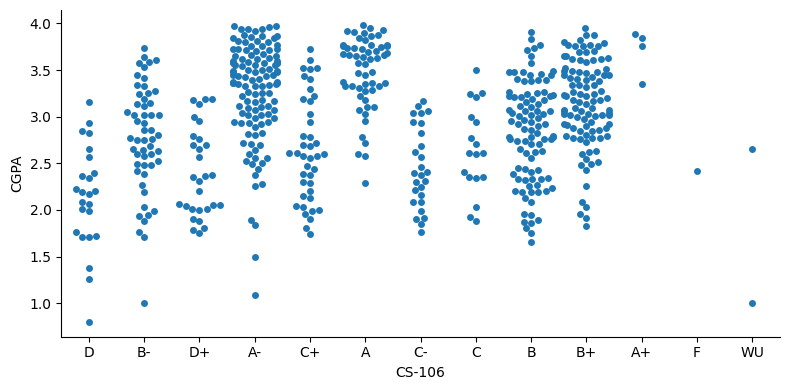

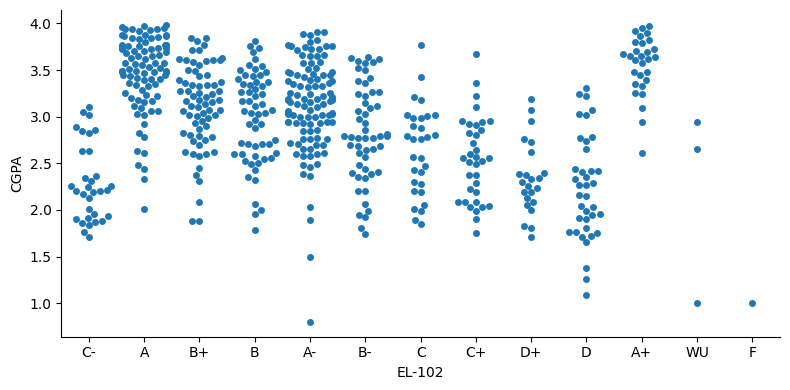

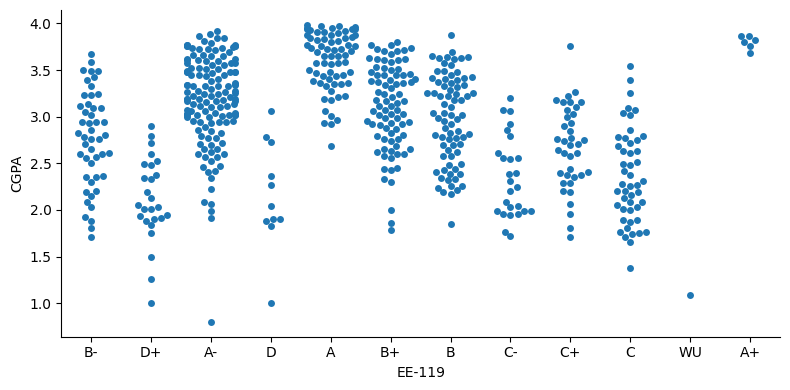

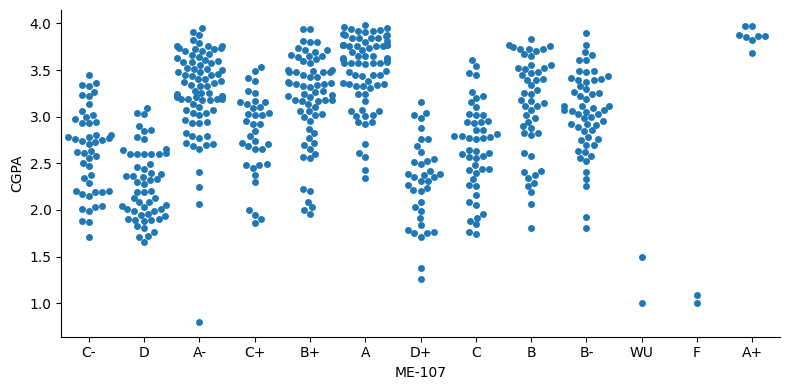

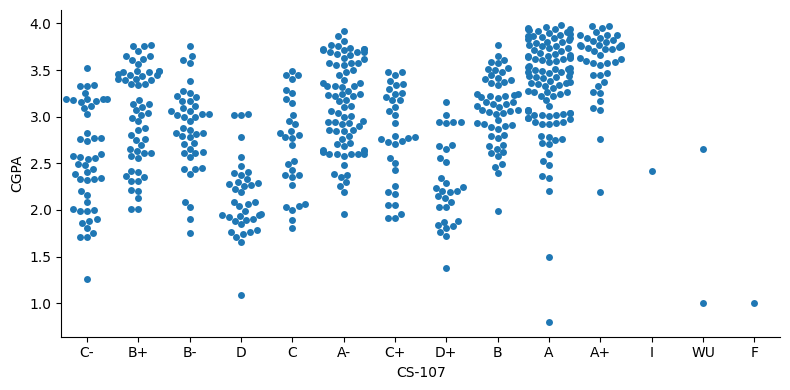

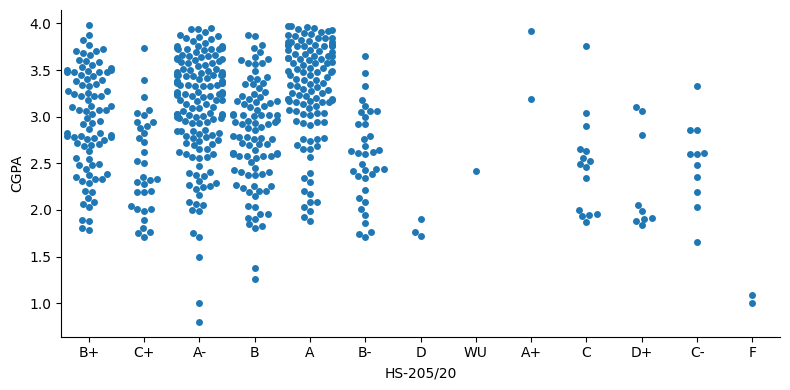

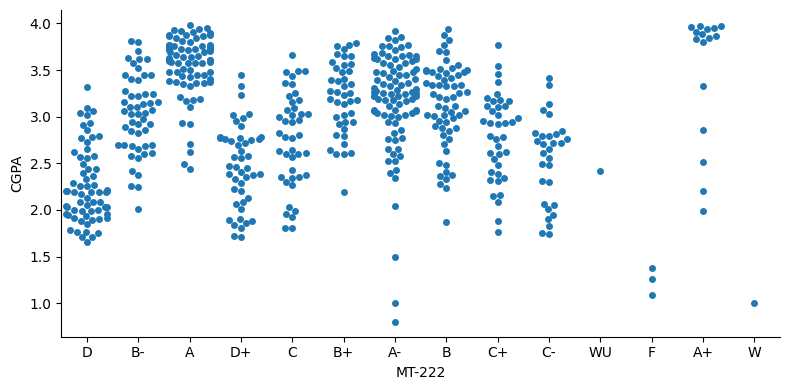

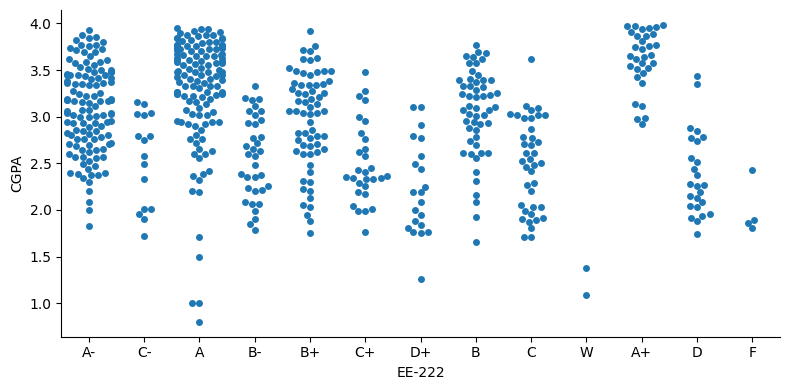

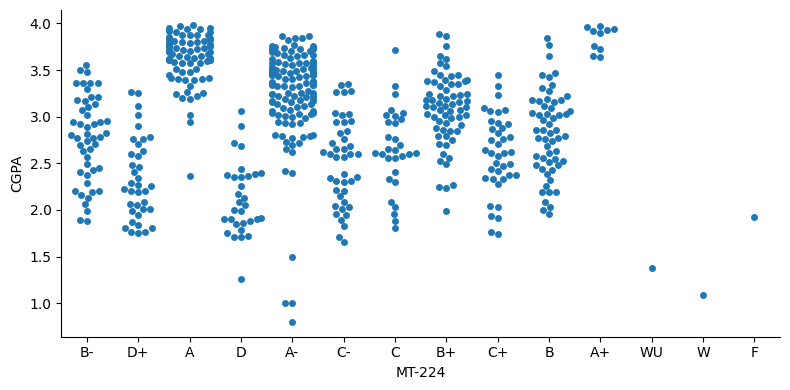

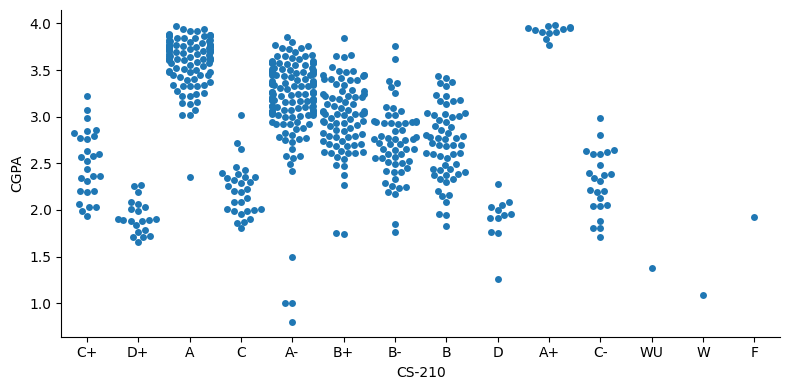

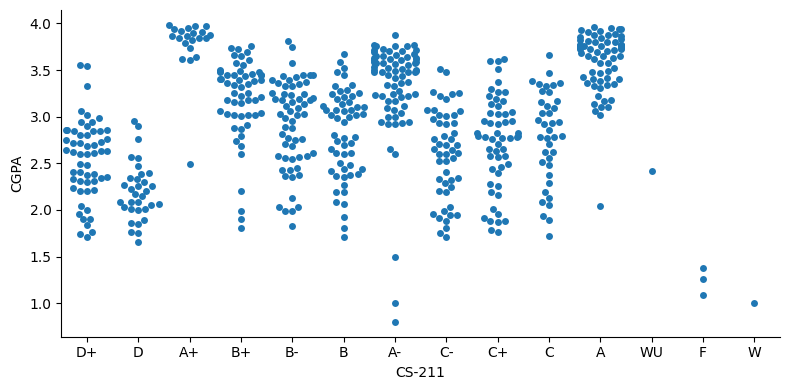

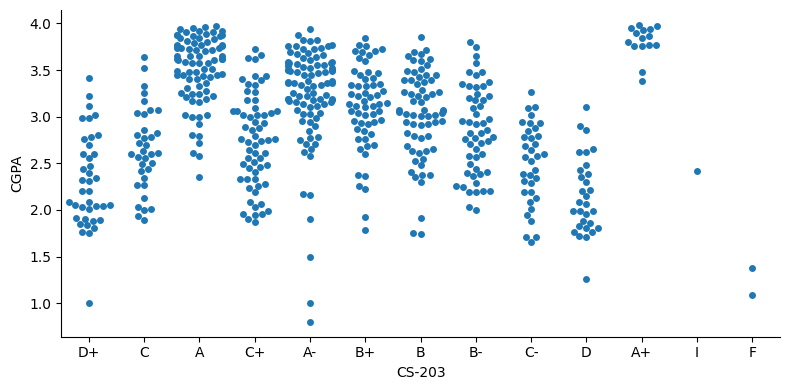

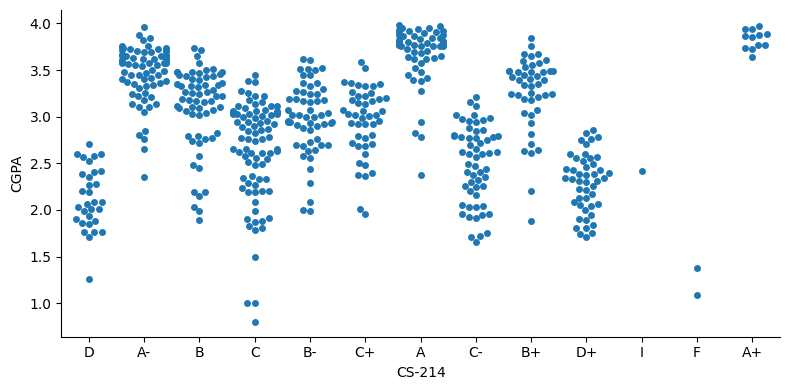

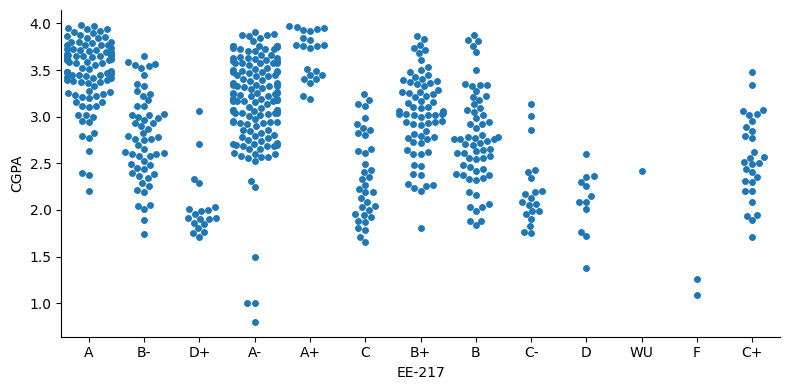

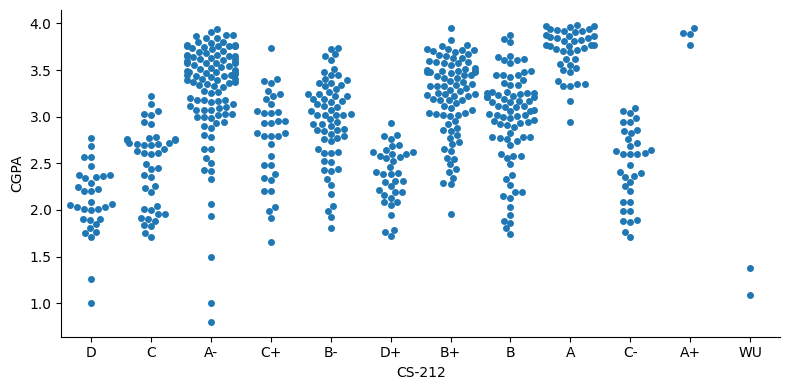

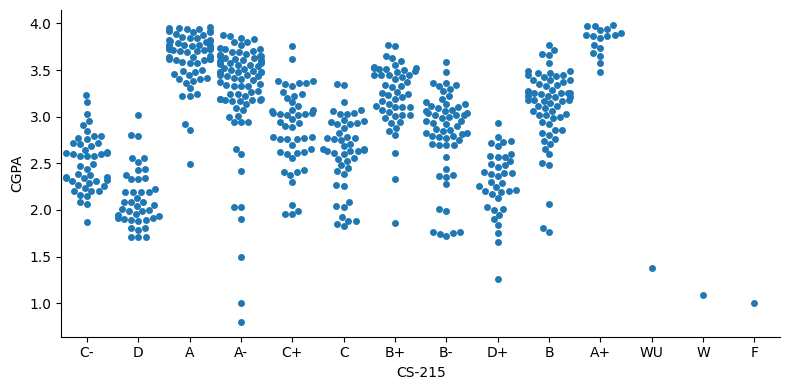

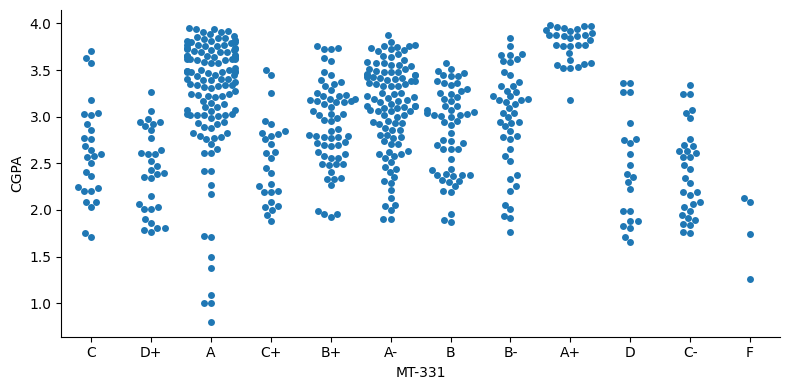

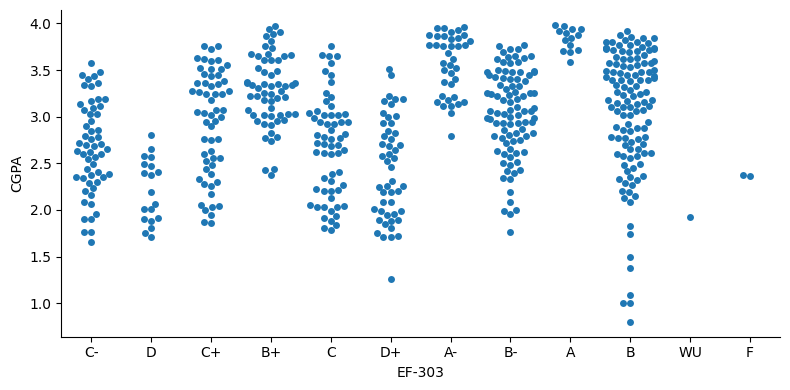

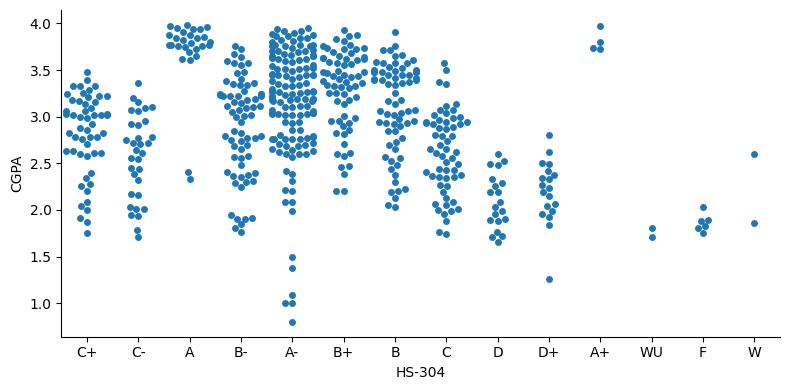

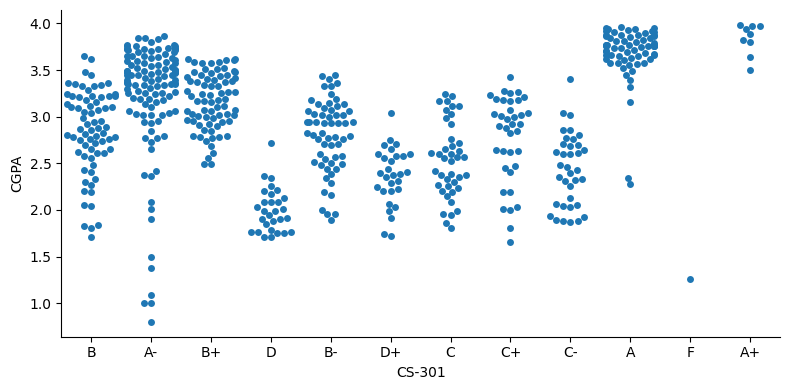

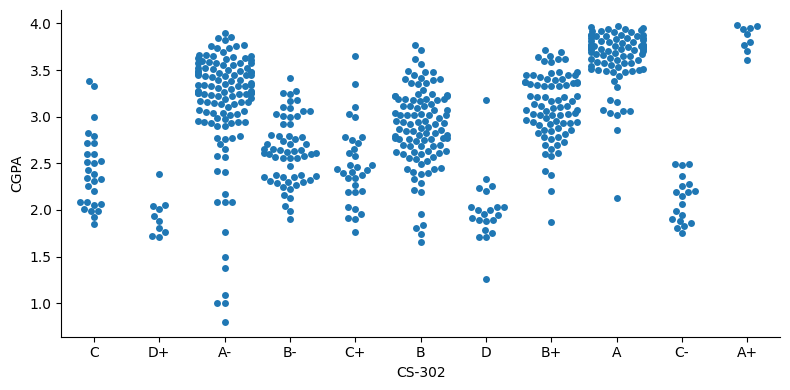

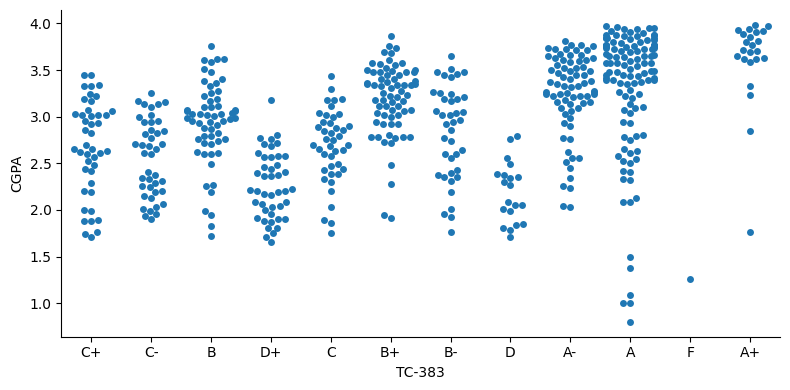

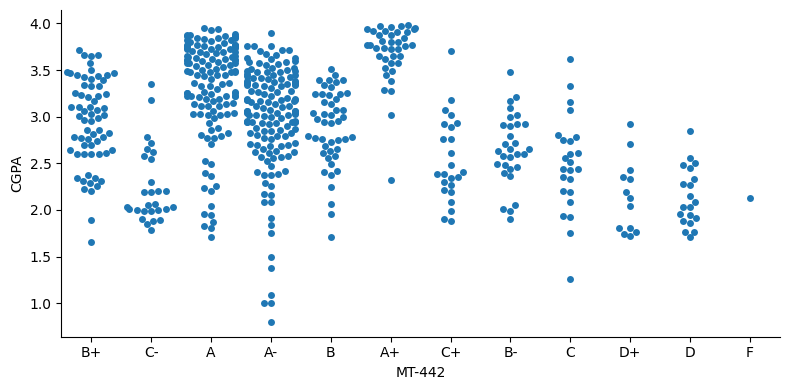

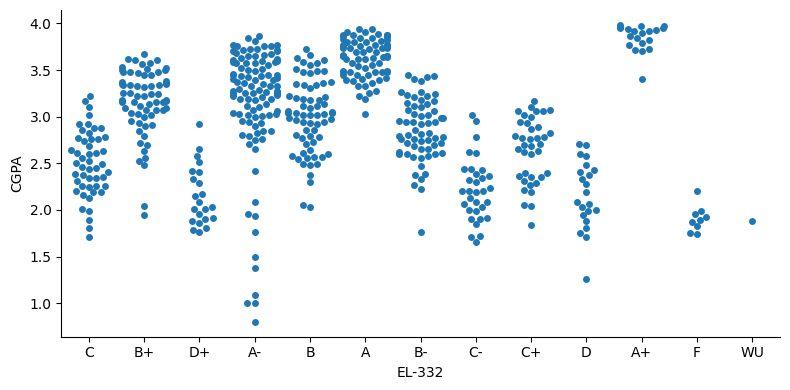

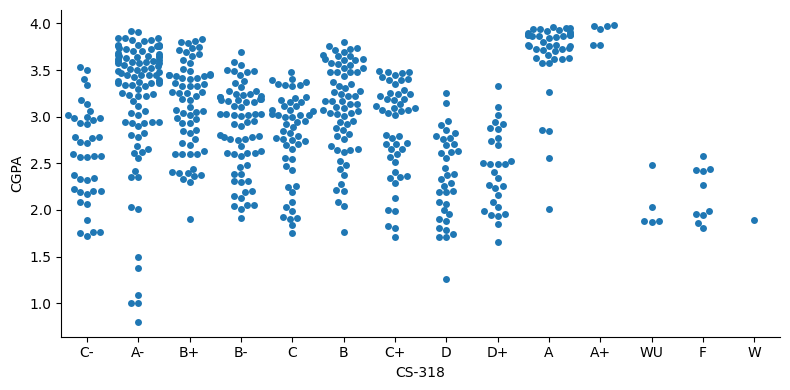

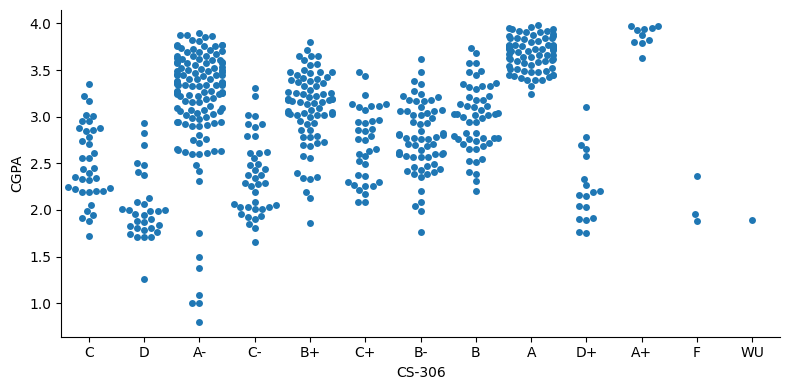

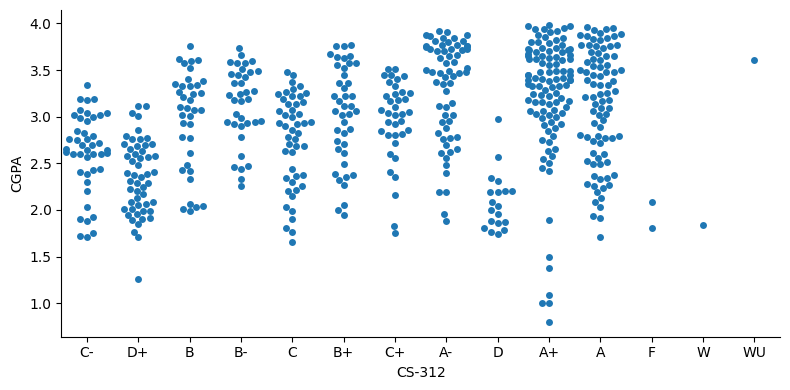

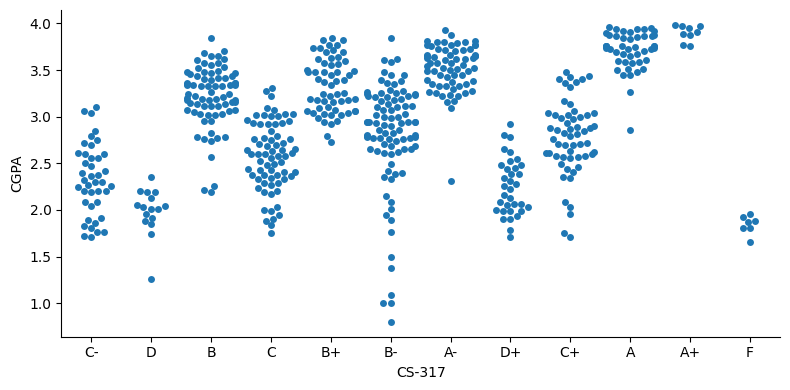

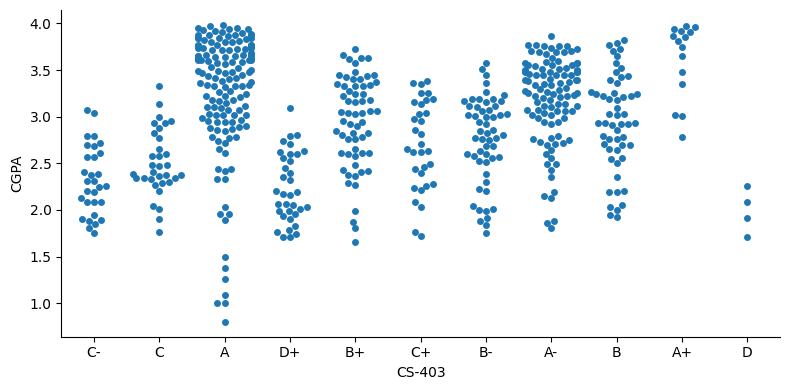

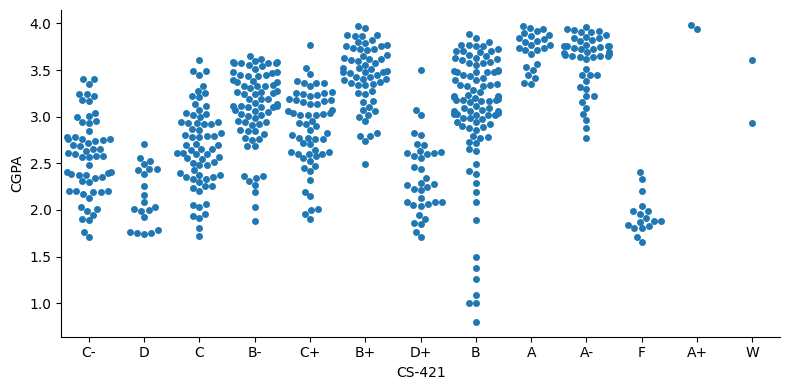

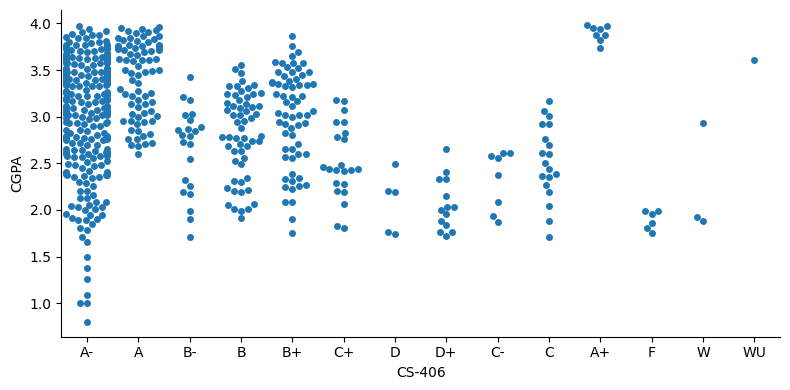

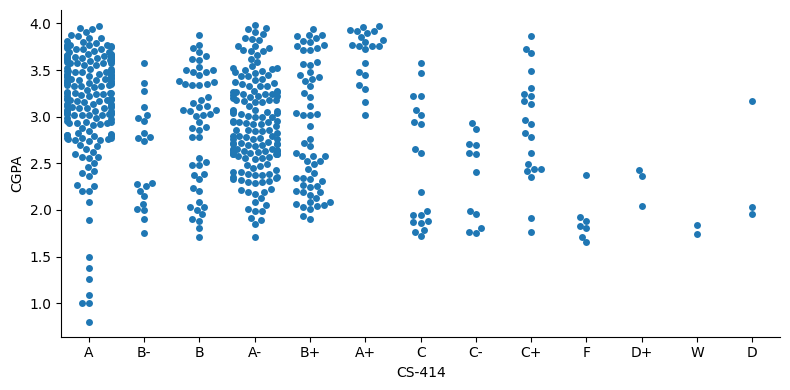

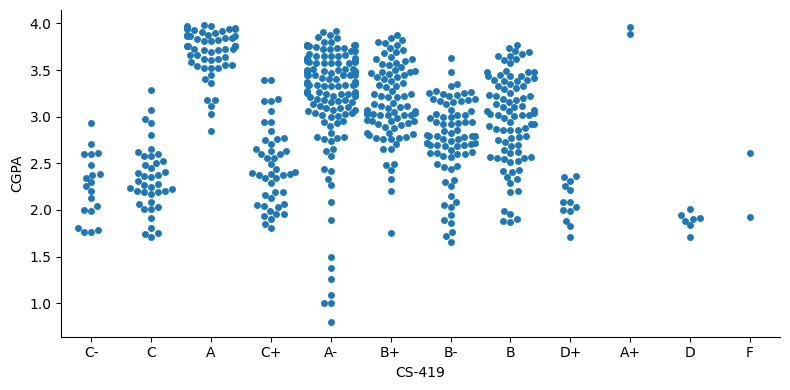

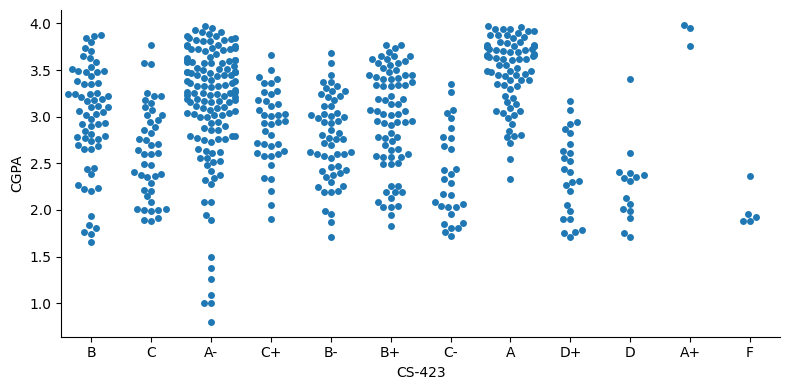

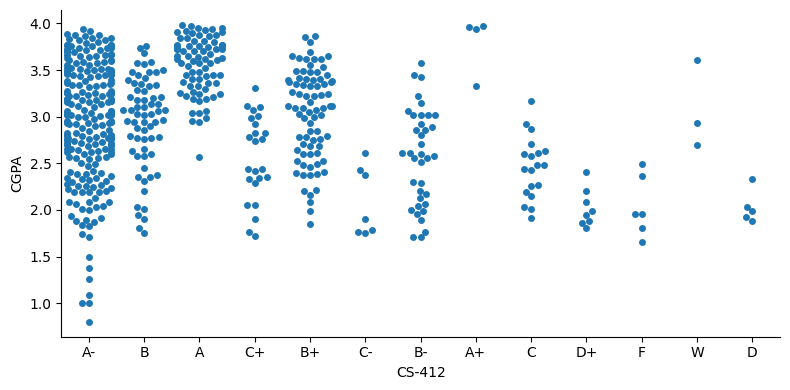

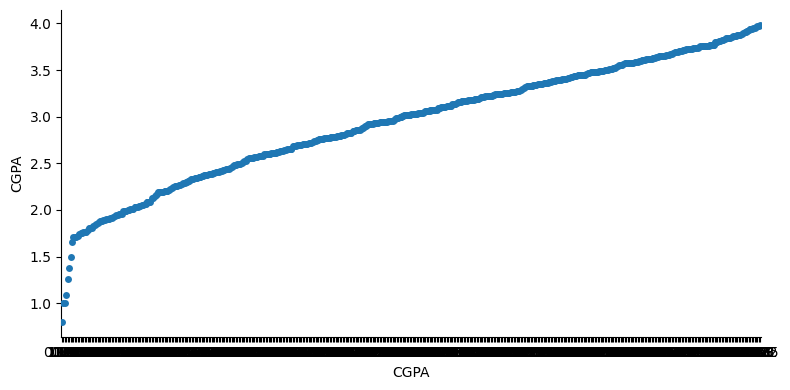

In [13]:
for i in Greades:
    sns.catplot(data=Greades,x=i,y='CGPA',kind='swarm',height=4,aspect=2)
    plt.show()

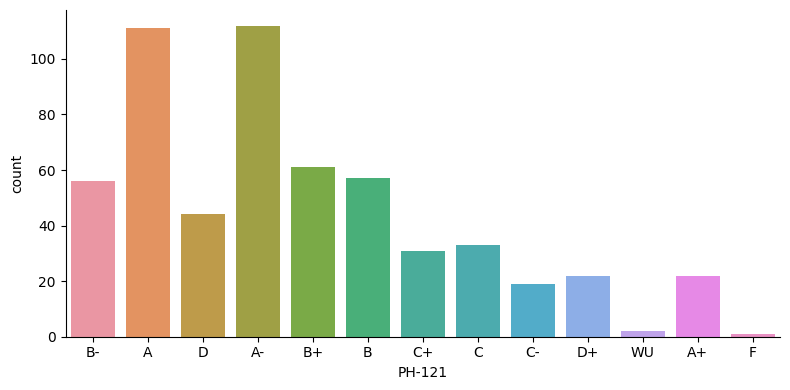

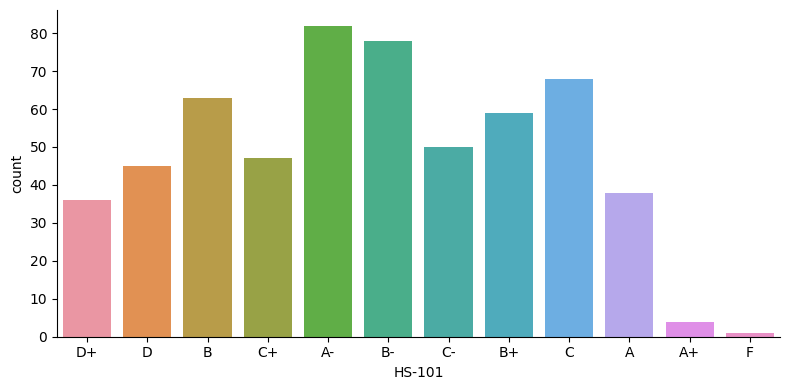

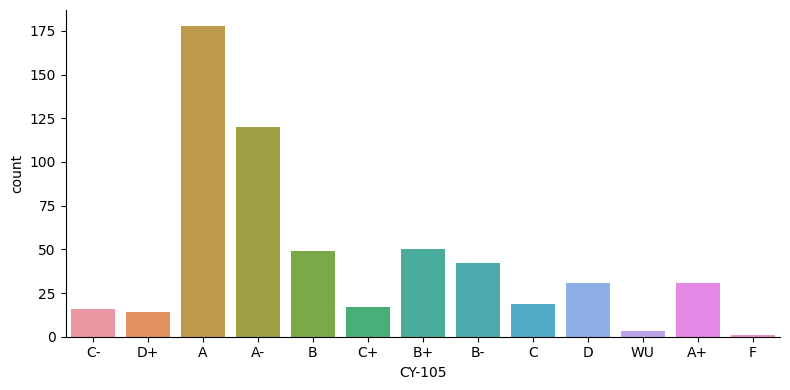

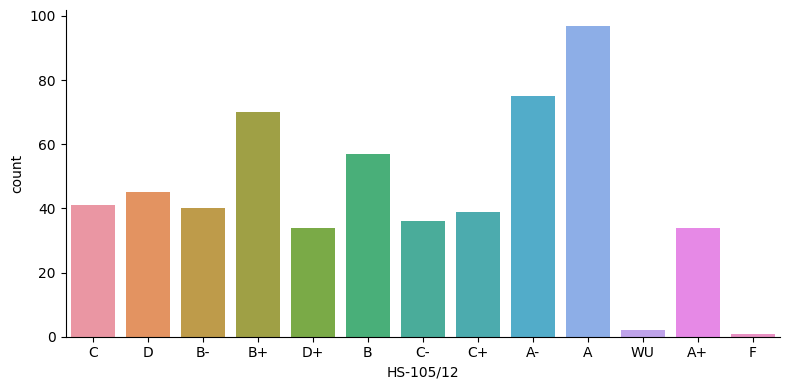

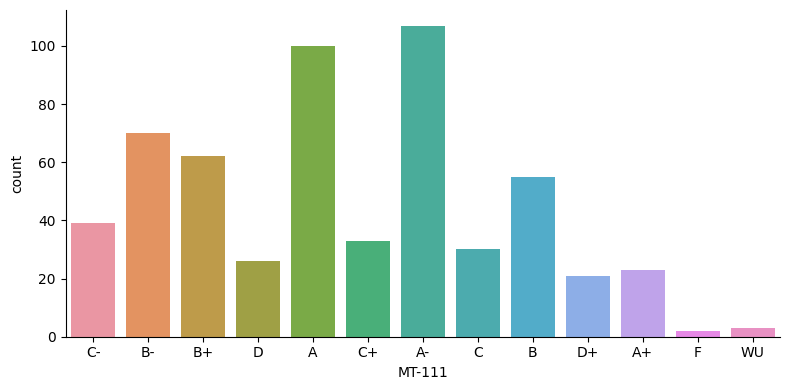

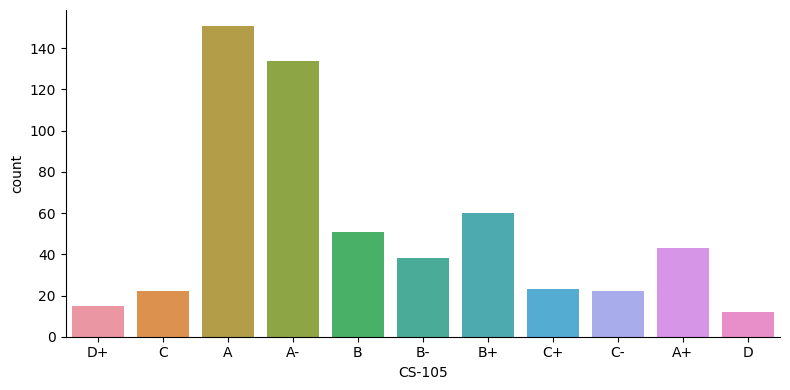

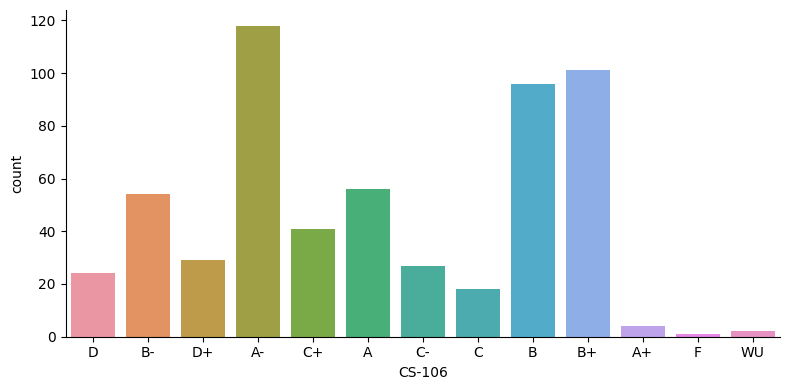

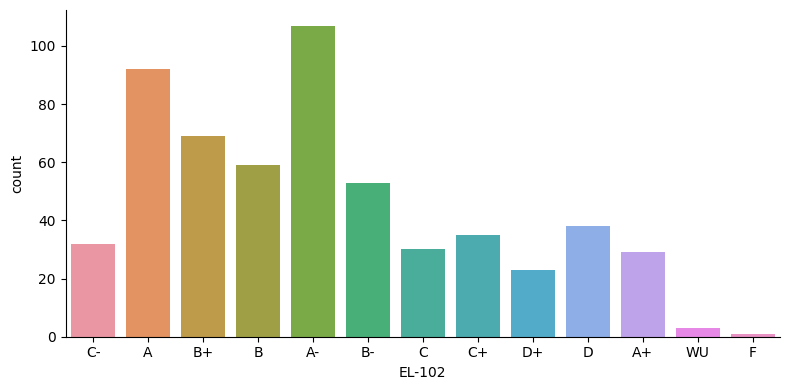

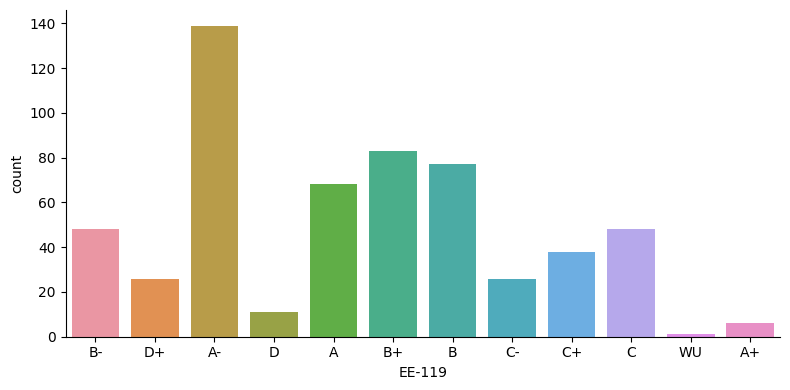

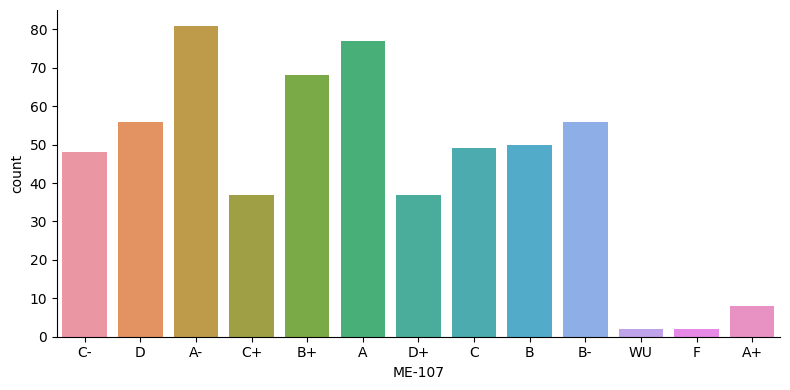

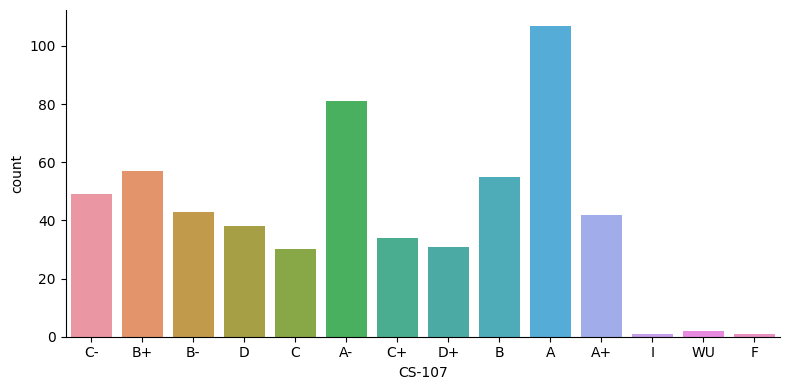

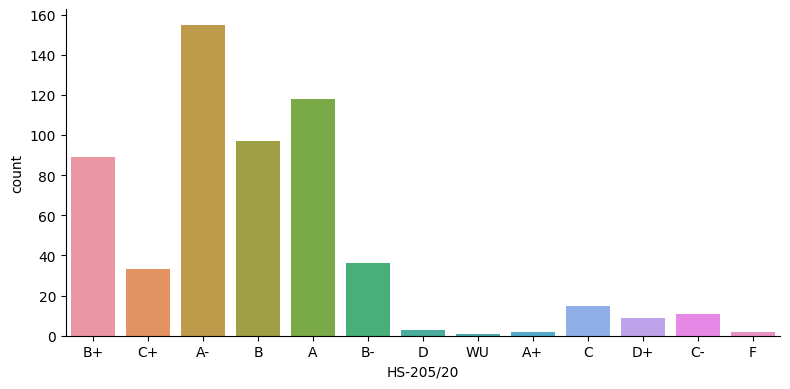

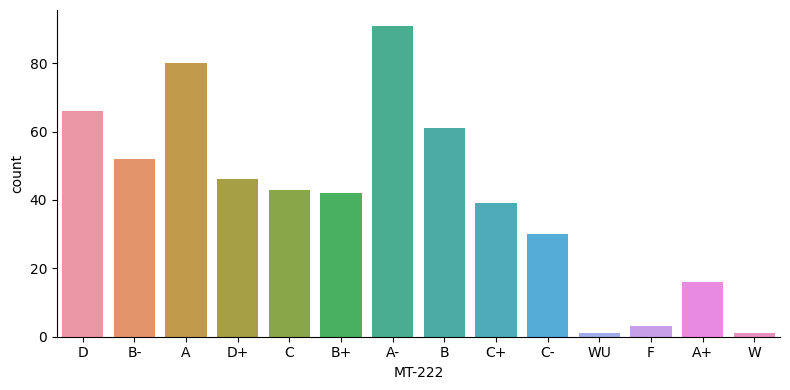

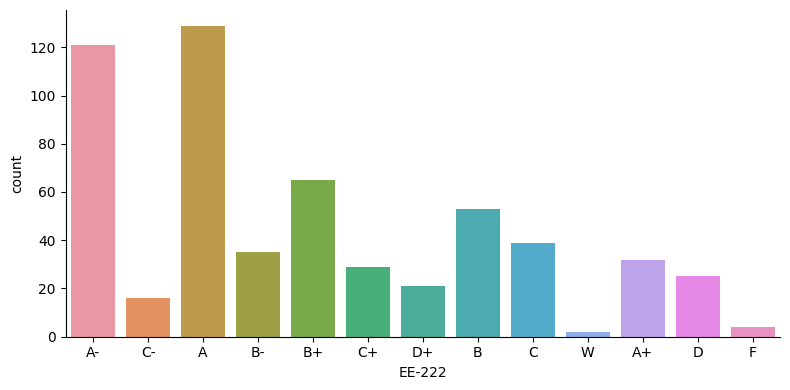

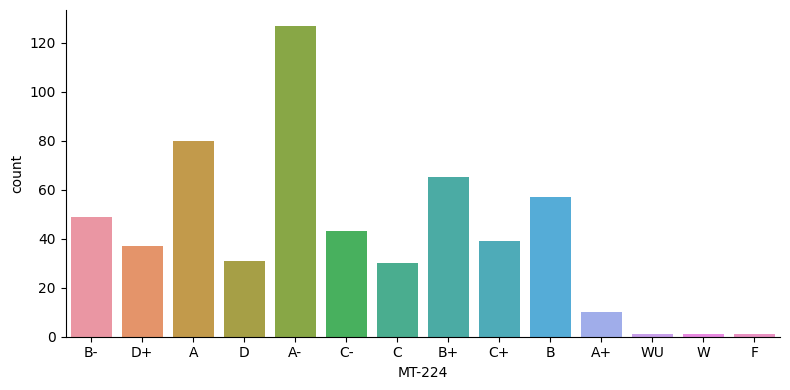

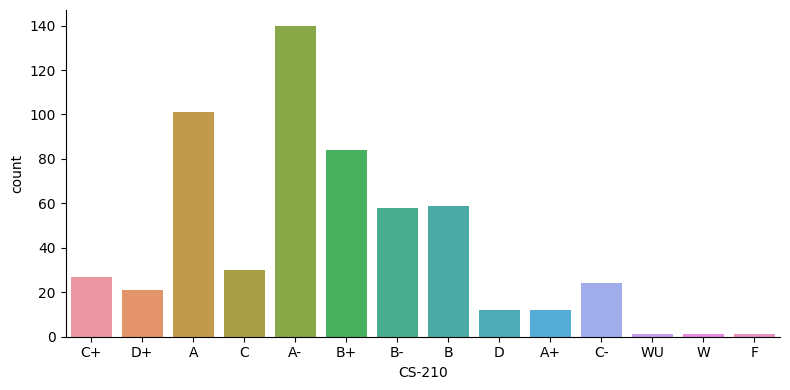

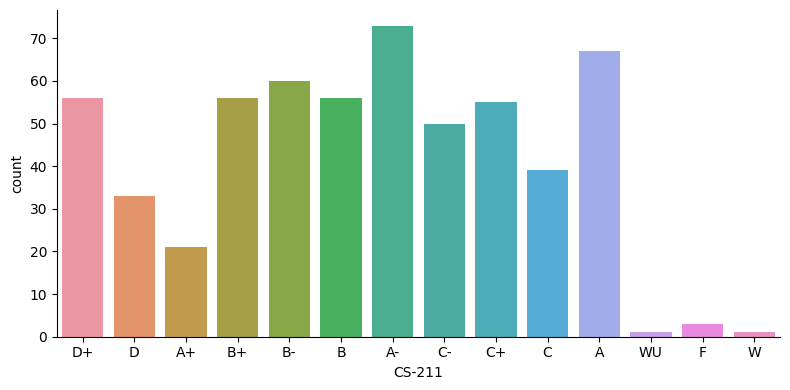

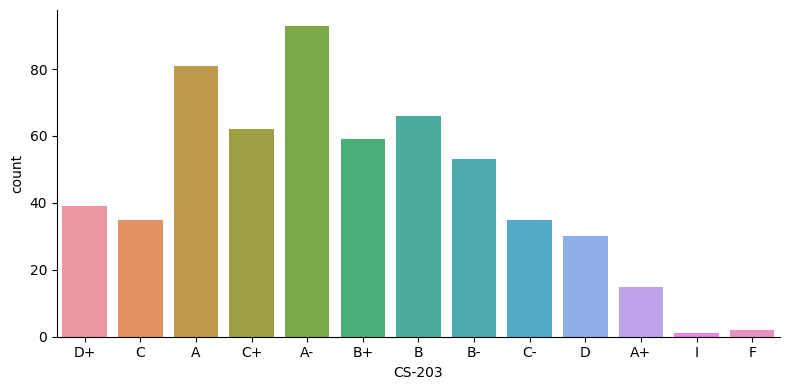

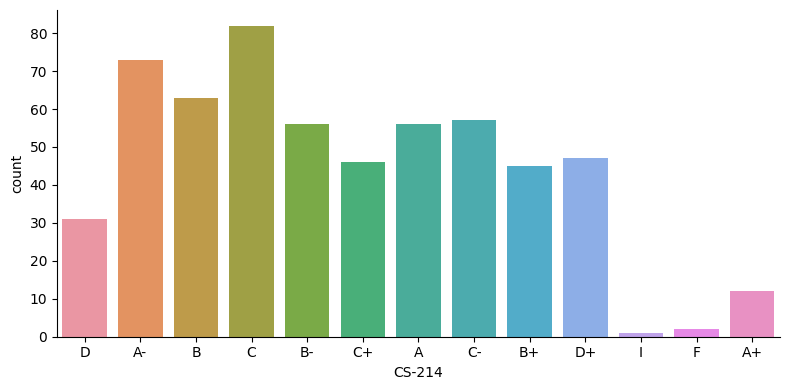

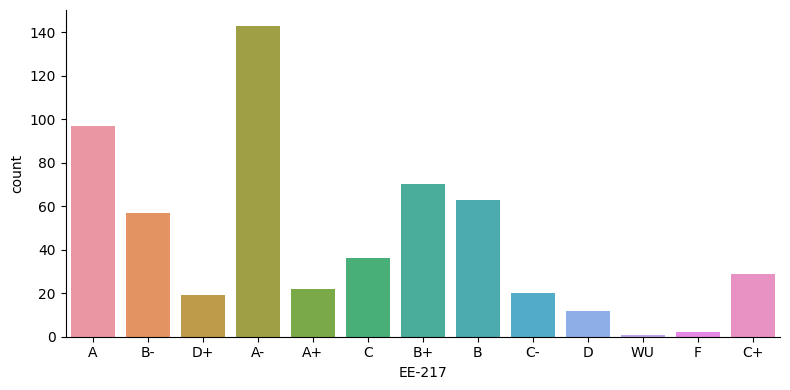

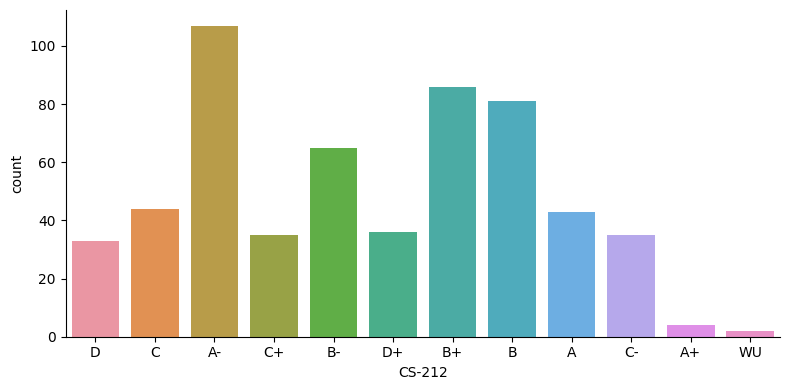

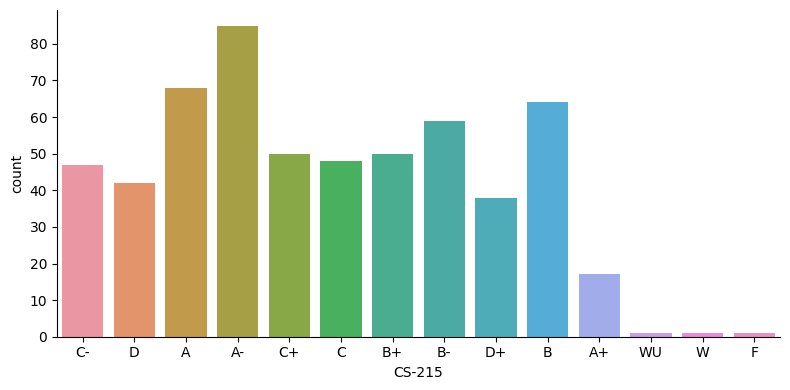

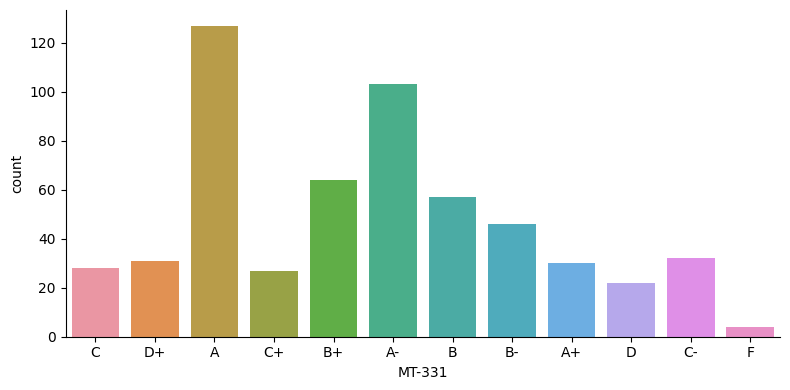

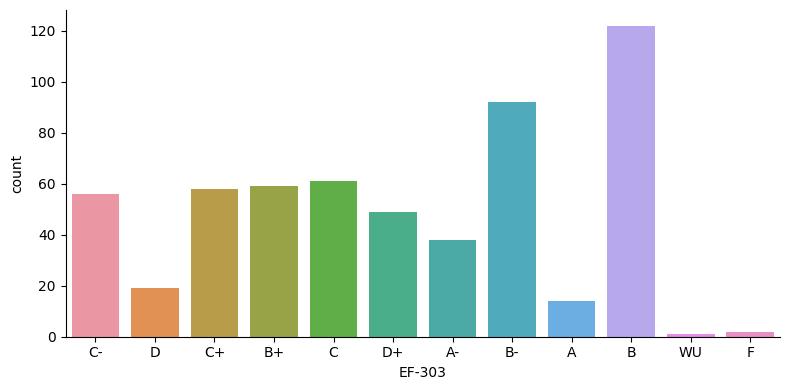

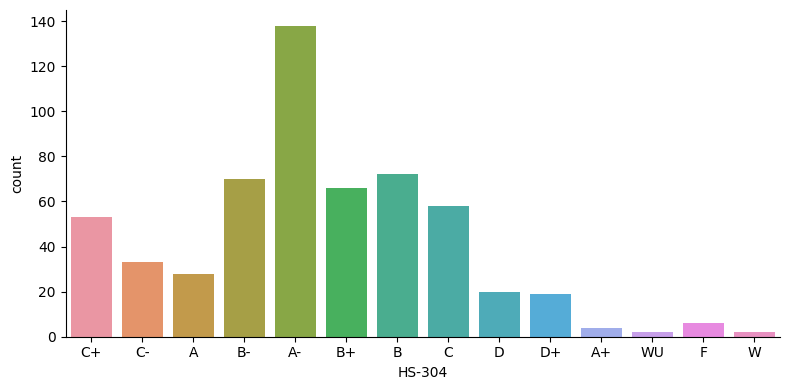

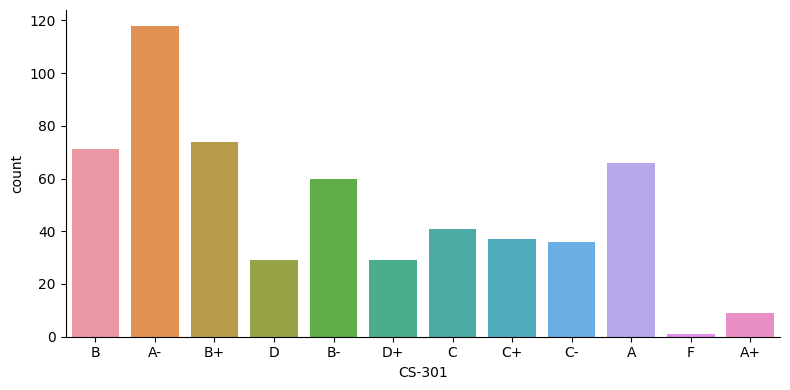

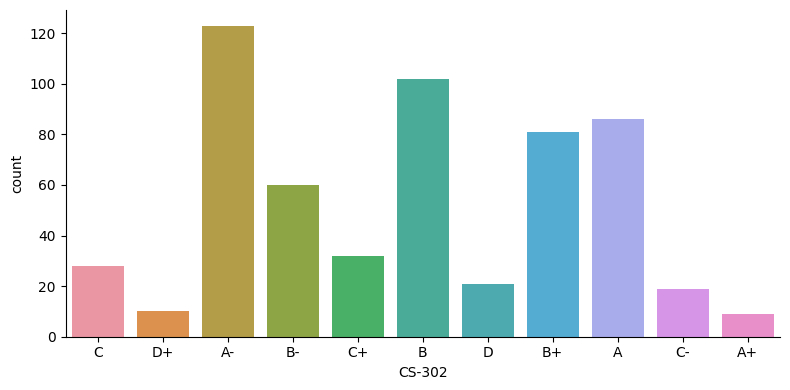

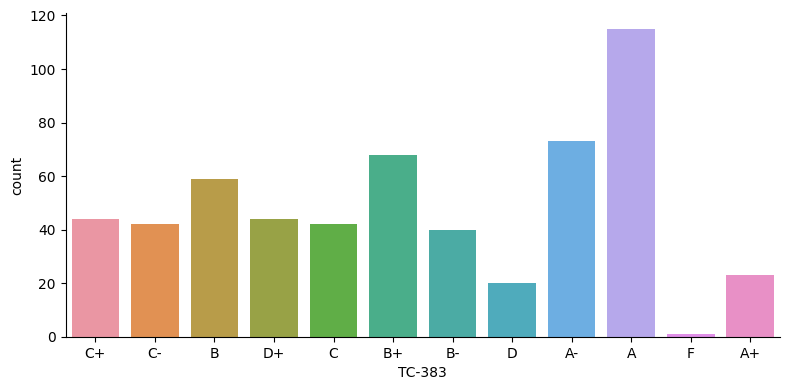

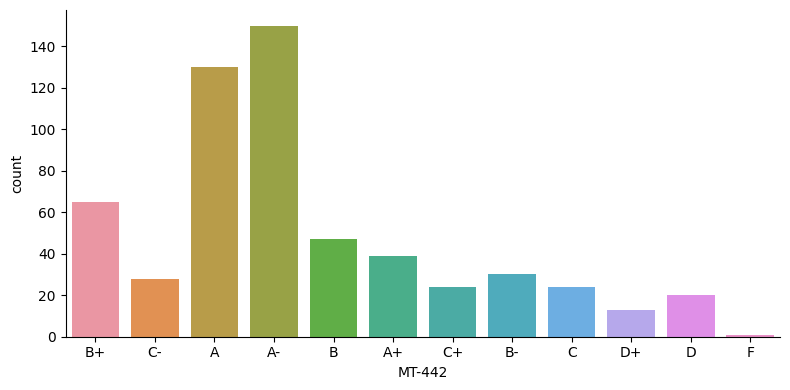

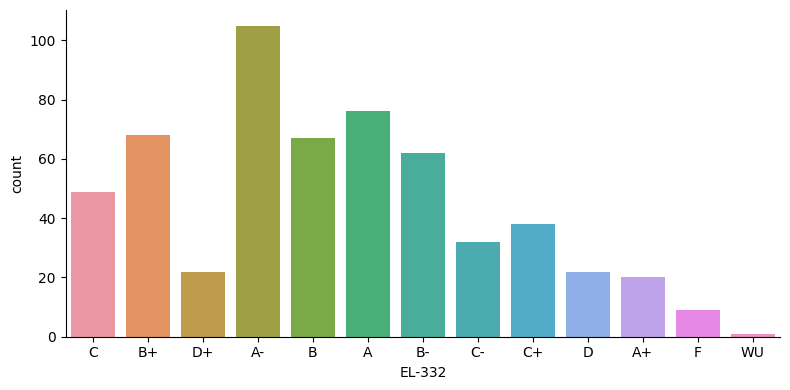

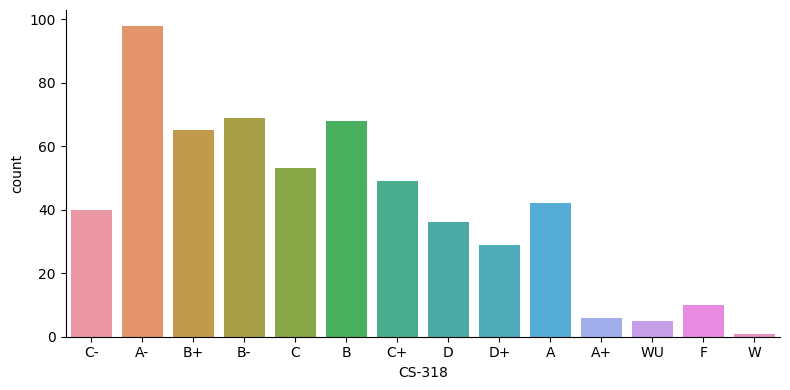

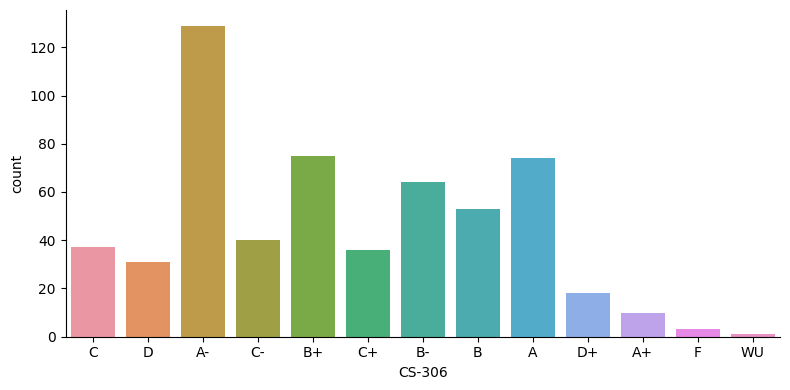

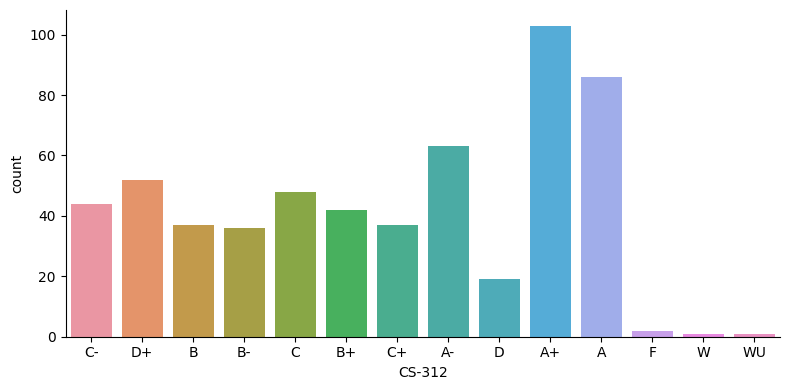

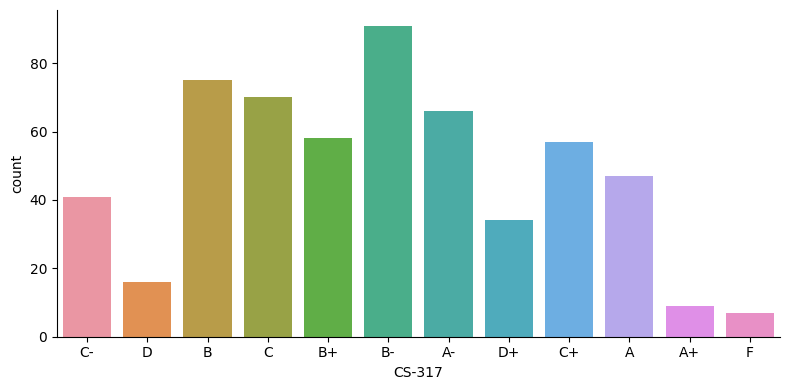

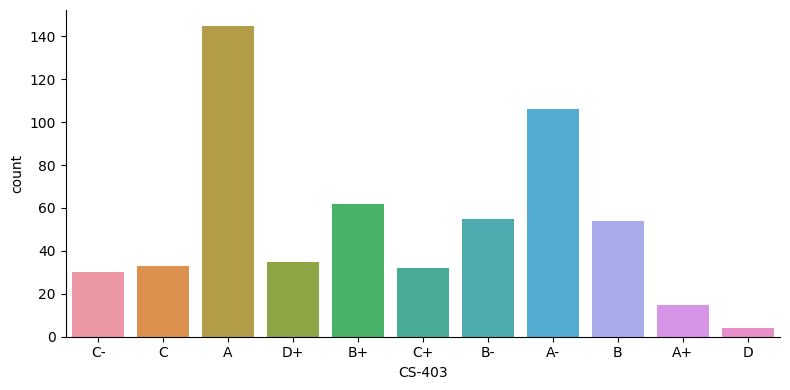

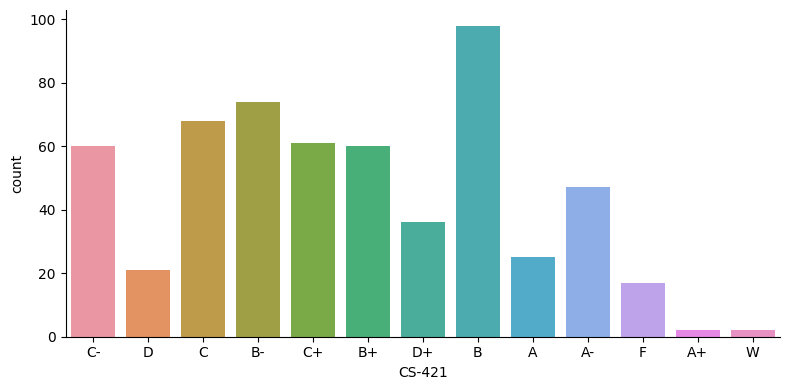

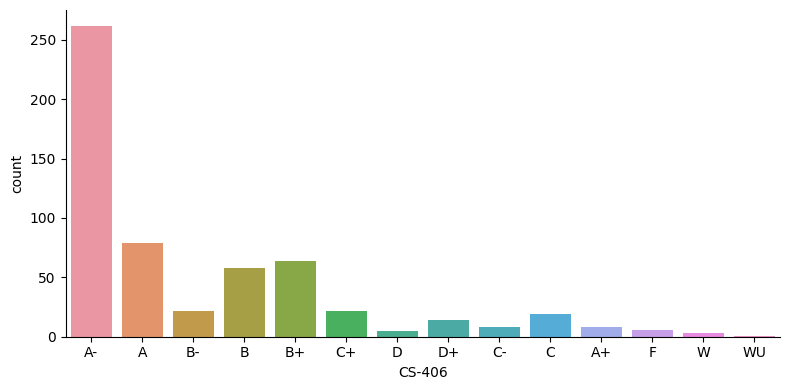

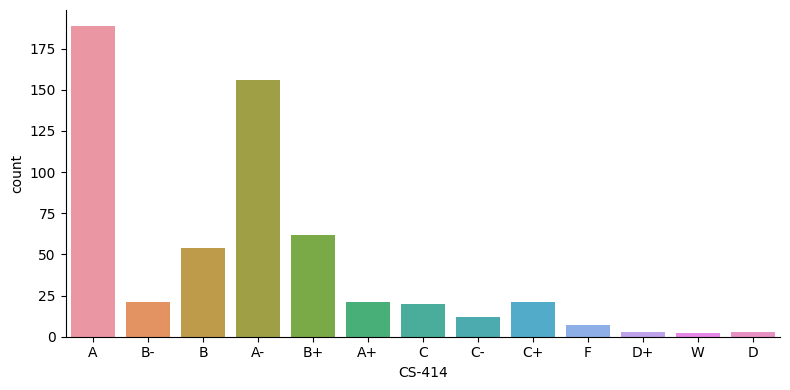

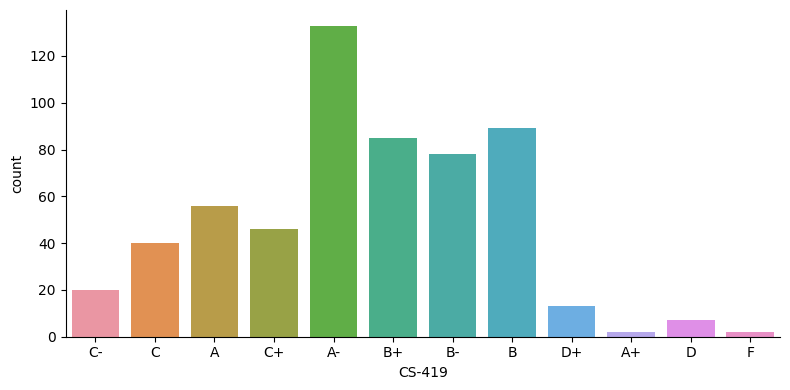

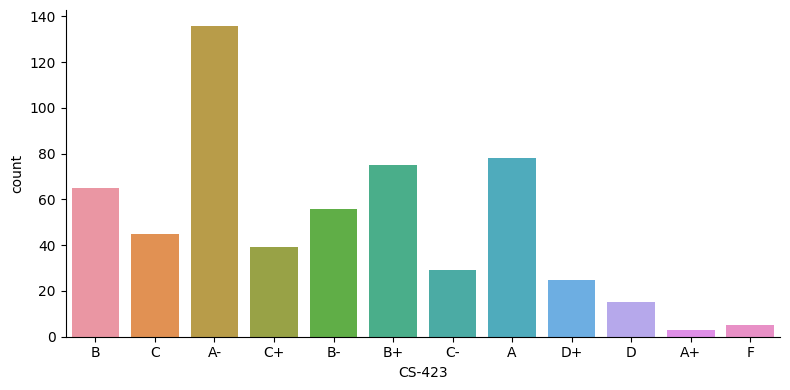

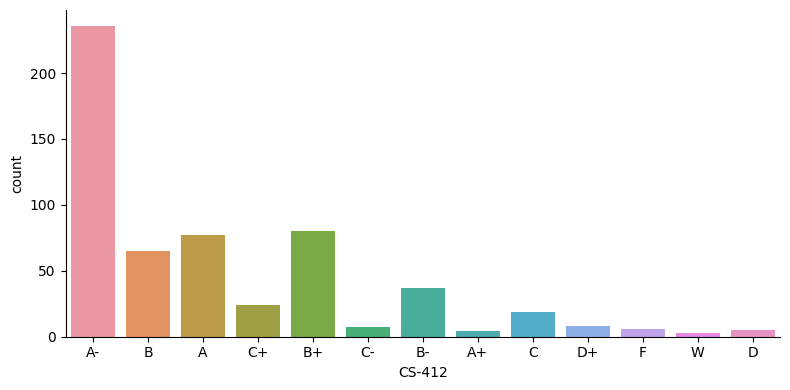

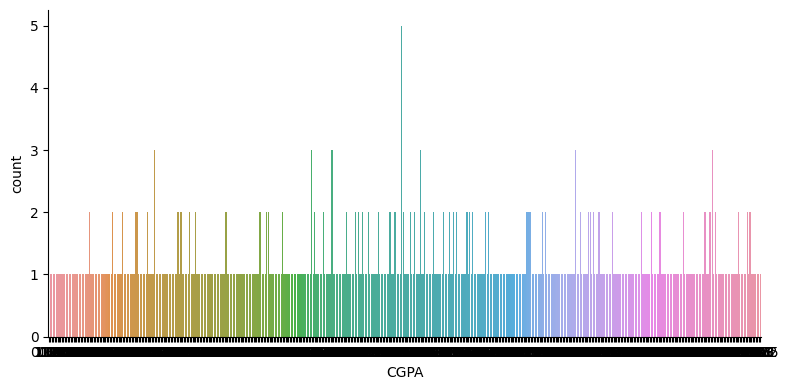

In [14]:
for i in Greades:
    sns.catplot(data=Greades,x=i,kind='count',height=4,aspect=2)
    plt.show()

In [15]:
Greades.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


<AxesSubplot:>

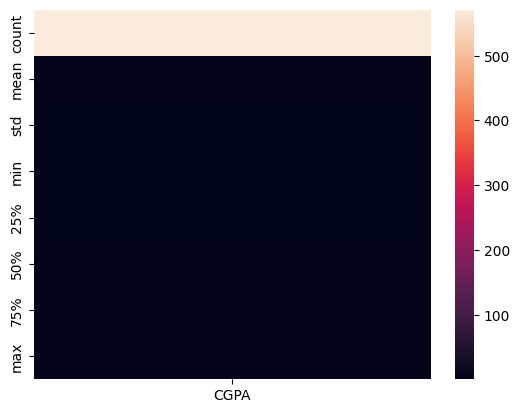

In [16]:
sns.heatmap(data=Greades.describe())

In [30]:
from sklearn.preprocessing import OrdinalEncoder
for column in Greades:
    if Greades[column].dtype==object:
        oe=OrdinalEncoder()
        Greades[column]=oe.fit_transform(Greades[column].values.reshape(-1,1))
    else: pass    

In [69]:
Greades['PH-121'].skew()


0.5491043367272309

In [75]:
for i in Greades:
    if Greades[i].skew()>5 or Greades[i].skew()<-4: 
        print(i)
    else: print(i,'--------'," NO ACTION REQUIRED IN SKEWNESS")    

PH-121 --------  NO ACTION REQUIRED IN SKEWNESS
HS-101 --------  NO ACTION REQUIRED IN SKEWNESS
CY-105 --------  NO ACTION REQUIRED IN SKEWNESS
HS-105/12 --------  NO ACTION REQUIRED IN SKEWNESS
MT-111 --------  NO ACTION REQUIRED IN SKEWNESS
CS-105 --------  NO ACTION REQUIRED IN SKEWNESS
CS-106 --------  NO ACTION REQUIRED IN SKEWNESS
EL-102 --------  NO ACTION REQUIRED IN SKEWNESS
EE-119 --------  NO ACTION REQUIRED IN SKEWNESS
ME-107 --------  NO ACTION REQUIRED IN SKEWNESS
CS-107 --------  NO ACTION REQUIRED IN SKEWNESS
HS-205/20 --------  NO ACTION REQUIRED IN SKEWNESS
MT-222 --------  NO ACTION REQUIRED IN SKEWNESS
EE-222 --------  NO ACTION REQUIRED IN SKEWNESS
MT-224 --------  NO ACTION REQUIRED IN SKEWNESS
CS-210 --------  NO ACTION REQUIRED IN SKEWNESS
CS-211 --------  NO ACTION REQUIRED IN SKEWNESS
CS-203 --------  NO ACTION REQUIRED IN SKEWNESS
CS-214 --------  NO ACTION REQUIRED IN SKEWNESS
EE-217 --------  NO ACTION REQUIRED IN SKEWNESS
CS-212 --------  NO ACTION REQUIRE

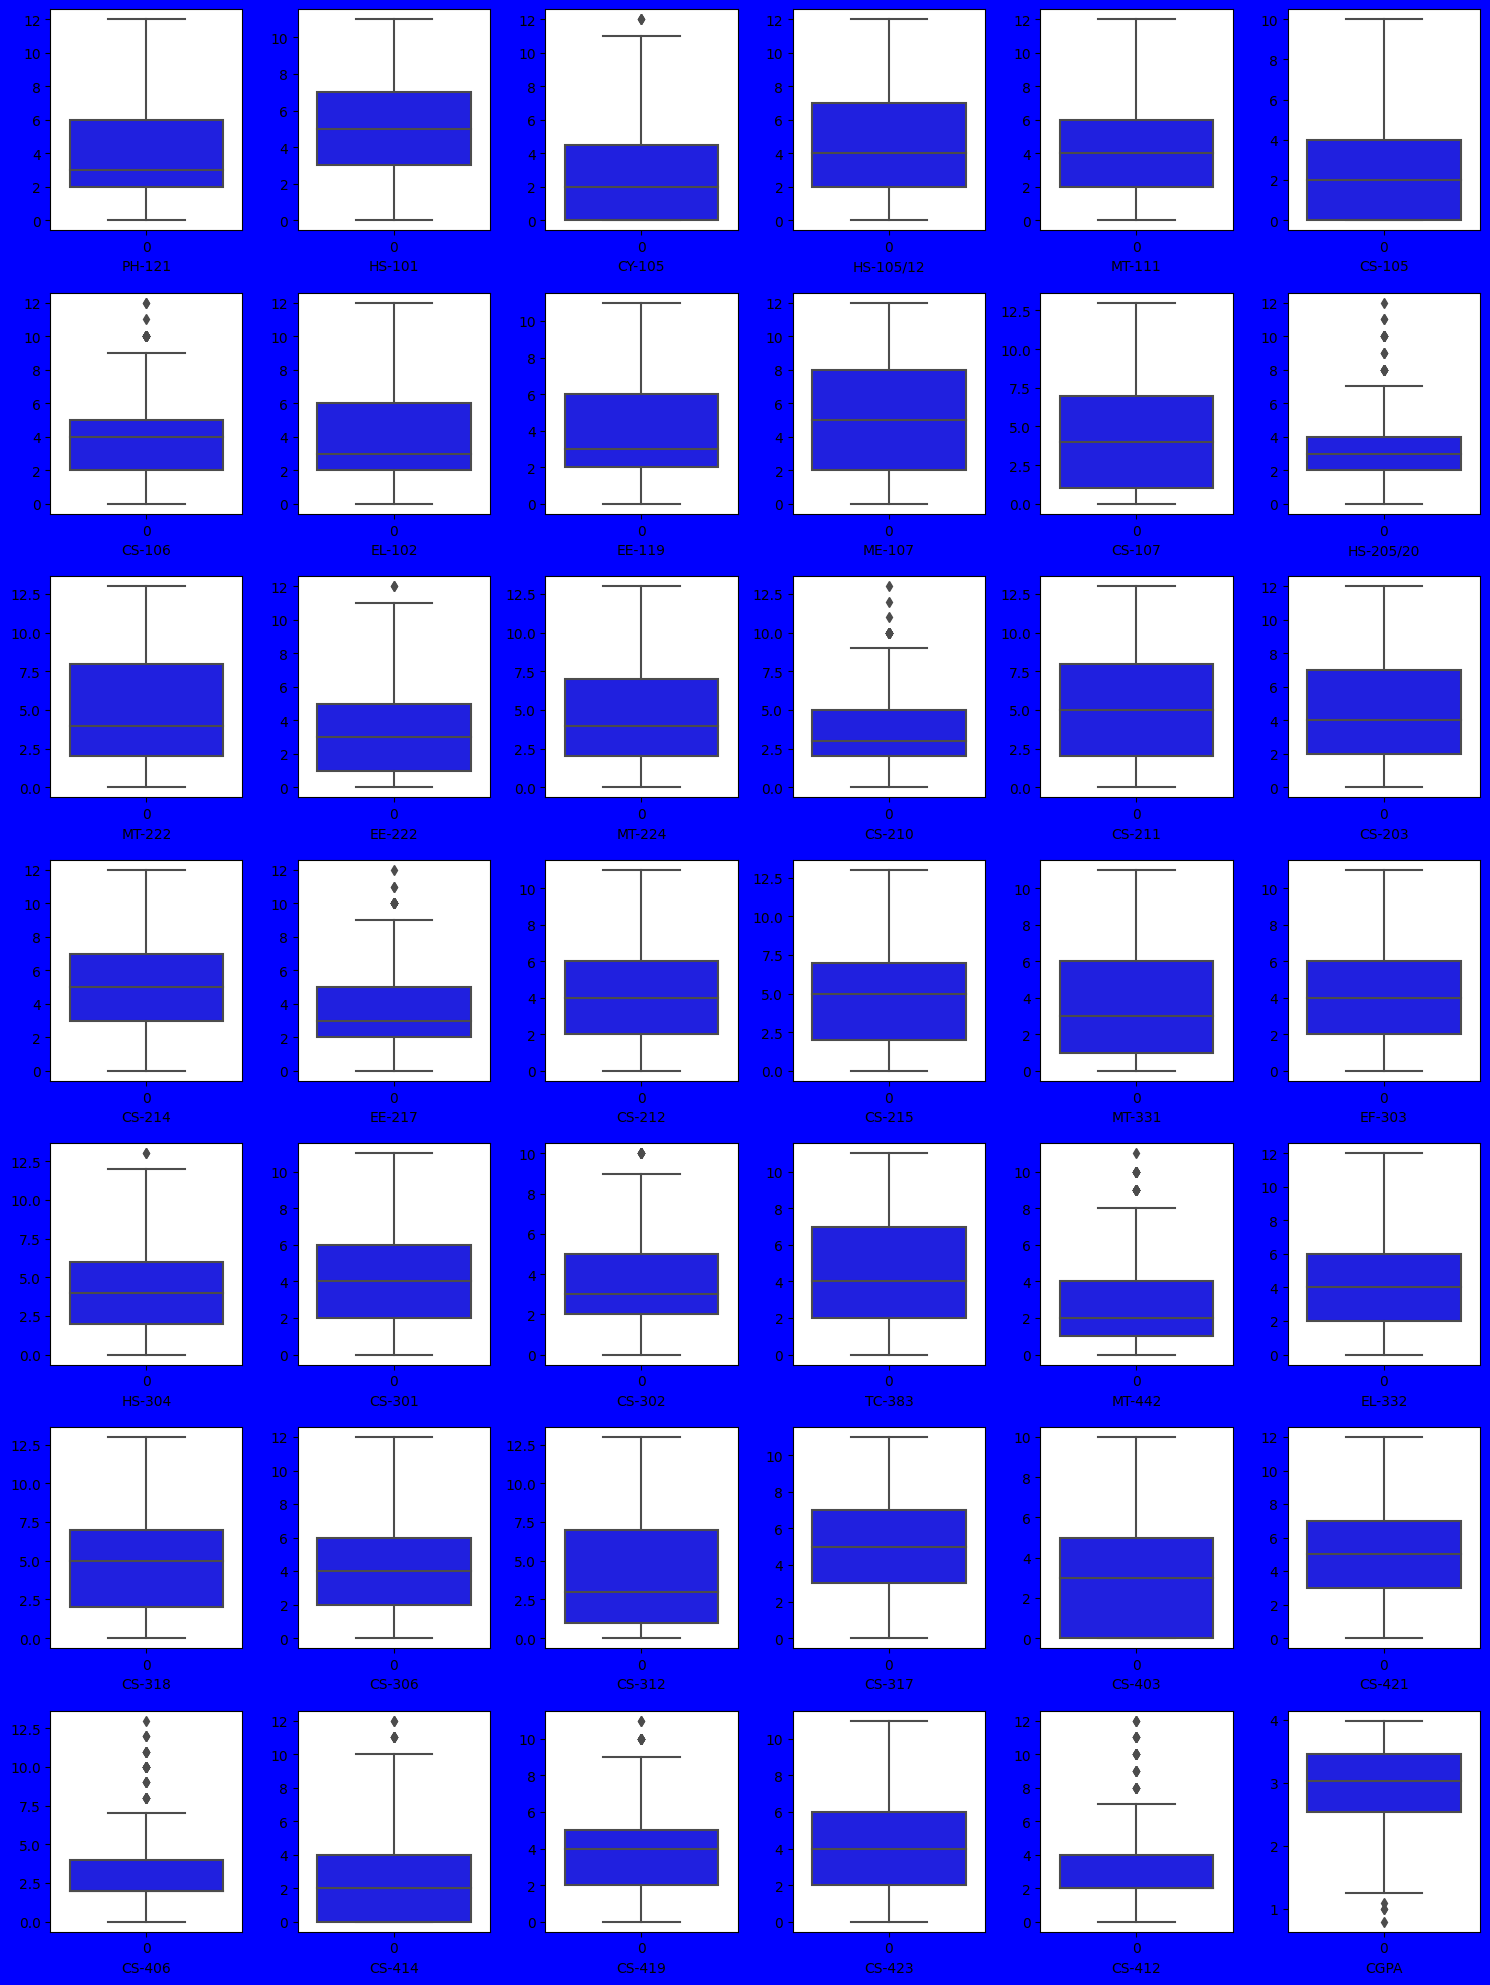

In [18]:
plt.figure(figsize=(15,20),facecolor='blue')
plotnumber=1
for column in Greades:
    plt.subplot(7,6,plotnumber)
    sns.boxplot(Greades[column],color='blue')
    plt.xlabel(column)
    plotnumber+=1
plt.tight_layout() 

In [34]:
columns=Greades.columns
out_lier=Greades[columns]
z=np.abs(zscore(out_lier))
## Removing outlier
Greades_z=Greades[(z<3).all(axis=1)]
print('## dataloss:')
print((Greades_z.shape[0]-Greades_z.shape[0])/(Greades.shape[0])*100)

## dataloss:
0.0


CGPA         1.000000
CS-414      -0.326585
HS-205/20   -0.447843
CS-406      -0.473742
CS-412      -0.491953
CS-312      -0.505202
HS-101      -0.515703
EF-303      -0.536365
MT-331      -0.543614
CS-106      -0.547210
CS-423      -0.559978
HS-304      -0.570892
CS-105      -0.576115
CS-107      -0.601132
HS-105/12   -0.608535
EE-222      -0.611967
CS-318      -0.613494
CS-403      -0.633787
PH-121      -0.634161
EL-102      -0.636553
EE-119      -0.638624
TC-383      -0.642229
CS-203      -0.654044
MT-442      -0.656786
CS-211      -0.657608
CY-105      -0.660512
ME-107      -0.666520
EE-217      -0.670509
CS-421      -0.674815
CS-212      -0.688602
MT-222      -0.690349
CS-419      -0.695222
MT-224      -0.722461
MT-111      -0.736437
CS-301      -0.738192
CS-302      -0.746890
CS-306      -0.748638
CS-214      -0.754824
CS-215      -0.765566
EL-332      -0.773570
CS-317      -0.783361
CS-210      -0.791749
Name: CGPA, dtype: float64


<AxesSubplot:>

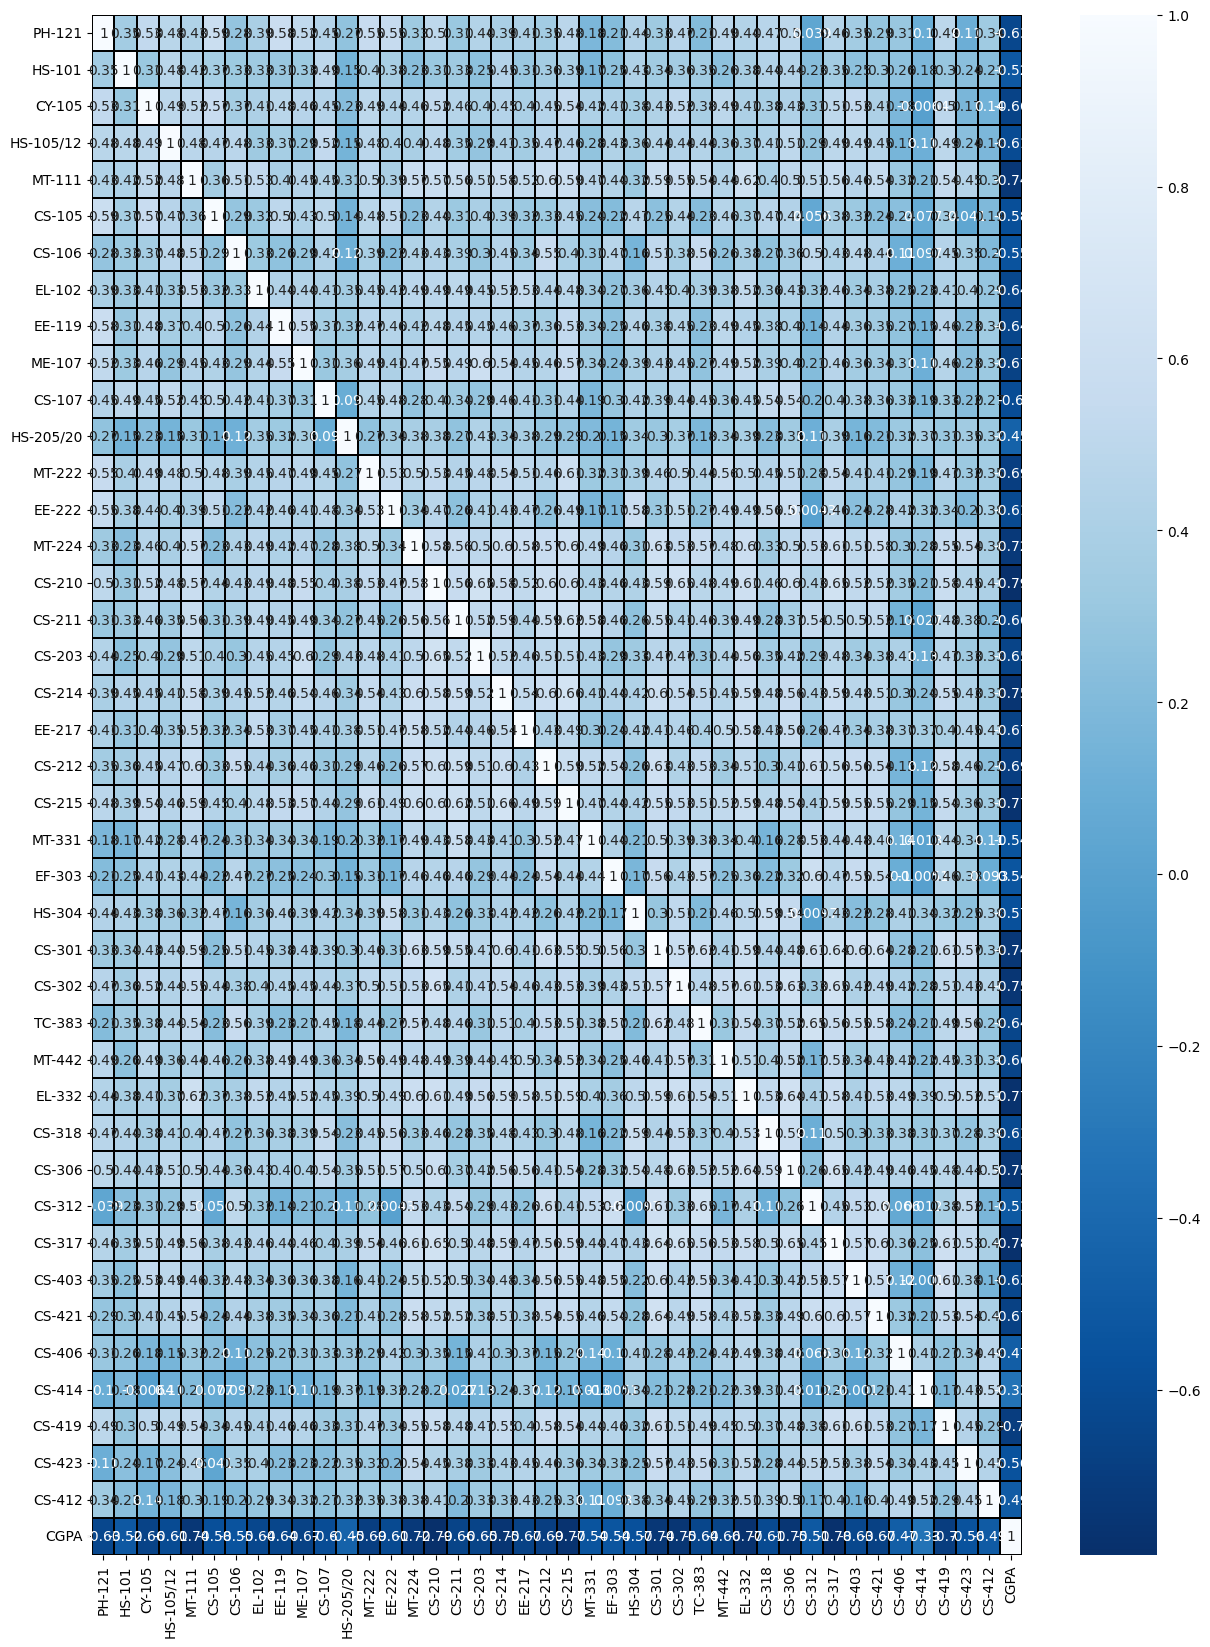

In [35]:
## Correlation:
cor=Greades_z.corr()
## relation with label and feature
print(cor['CGPA'].sort_values(ascending=False))
## Plotting a heat map
plt.figure(figsize=(15,20))
sns.heatmap(Greades_z.corr(),cmap='Blues_r',fmt='0.2g',linecolor='black',annot=True,linewidths=0.1)

In [36]:
x=Greades_z.drop(columns=['CGPA'])
y=Greades_z['CGPA']
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

In [37]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i)for i in range(x.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,2.760069,PH-121
1,1.816850,HS-101
2,2.473597,CY-105
3,2.339592,HS-105/12
4,2.666159,MT-111
5,2.349412,CS-105
6,1.978240,CS-106
7,1.905580,EL-102
8,2.167831,EE-119
9,2.322644,ME-107


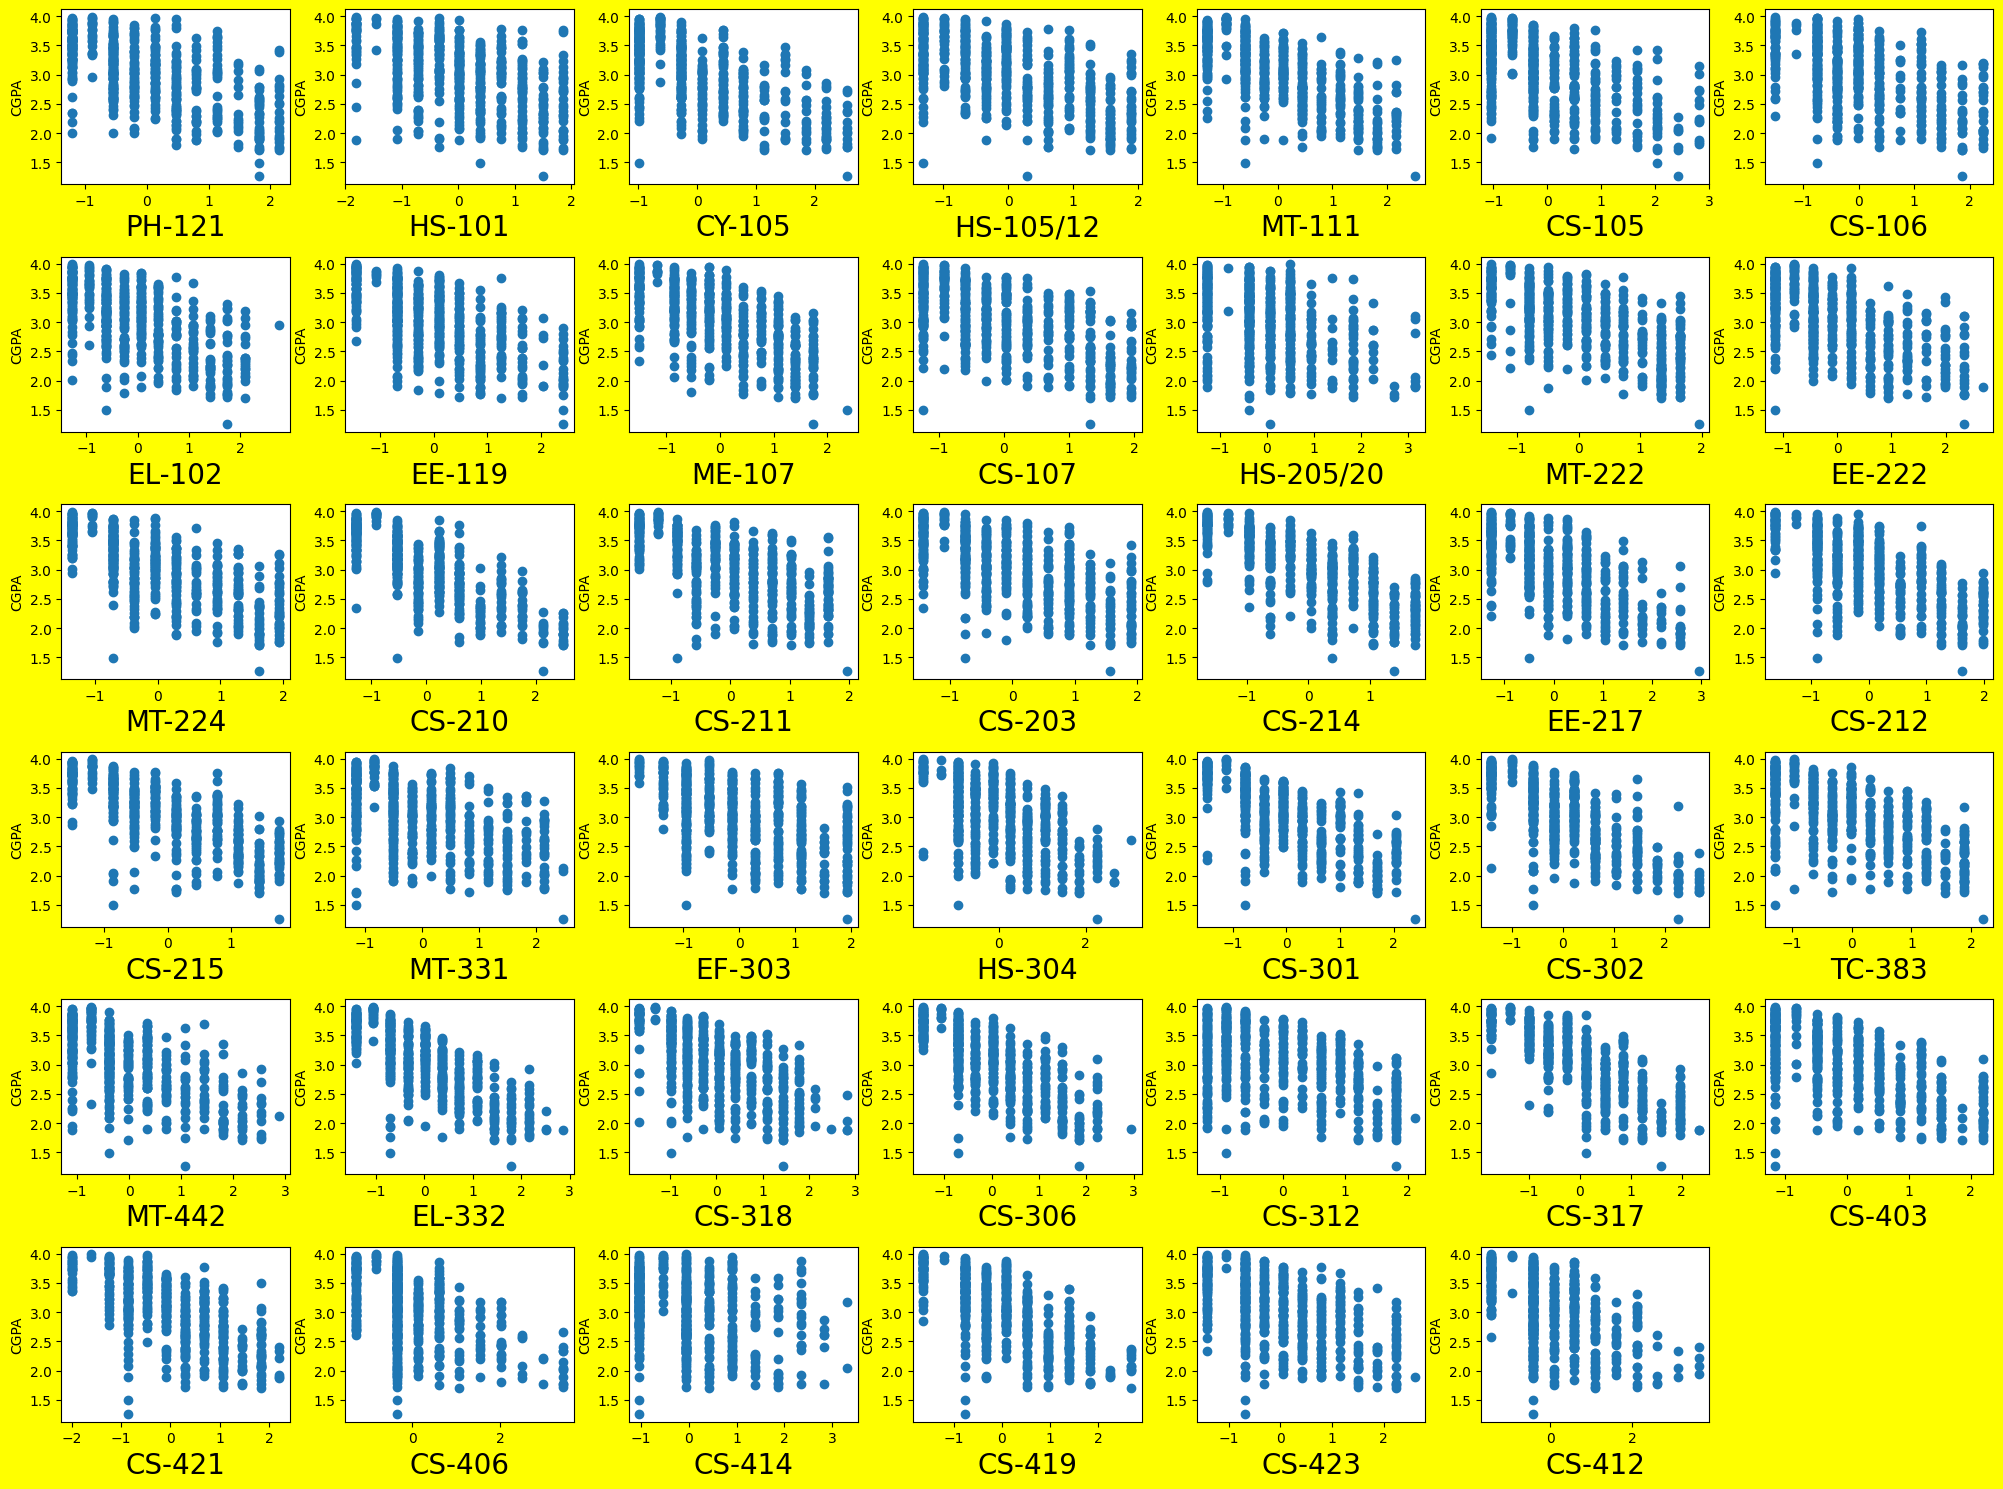

In [39]:
## Relationship between feature and lable
plt.figure(figsize=(20,15), facecolor= 'yellow')
plotnumber=1
for column in x:
    if plotnumber<=42:
        anext=plt.subplot(6,7,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize='20')
        plt.ylabel('CGPA',fontsize=10)
    plotnumber+=1
plt.tight_layout()  

In [40]:
max_accuracy=0
max_rs=0
for i in range (3000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    regression_lr=LinearRegression()
    regression_lr.fit(x_train,y_train)
    pred=regression_lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc > max_accuracy:
        max_accuracy=acc
        max_rs=i

print('Maximum accuracy:',max_accuracy, 'on random state:',max_rs) 

Maximum accuracy: 0.9882751735167273 on random state: 1248


In [41]:

## Train_Test_Fit of Data:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=max_rs)

In [42]:
regression_lr=LinearRegression()
regression_lr.fit(x_train,y_train)
pred_lr=regression_lr.predict(x_test)
pred_lr_train=regression_lr.predict(x_train)
print('r2_score=',r2_score(y_test,pred_lr))
print('r2_score on training data=',r2_score(y_train,pred_lr_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_lr))
print('mean_squared_error=', mean_squared_error(y_test,pred_lr))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_lr)))

print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_lr=cross_val_score(regression_lr,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_lr)
print('avg:',cv_score_lr.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_lr)-cv_score_lr.mean())*100)

r2_score= 0.9882751735167273
r2_score on training data= 0.960347432966574
mean_absolute_error= 0.0493885180802726
mean_squared_error= 0.003828796438071399
root_mean_square_error 0.06187726915492796
_______________________CV_SCORE_ANALYSIS________________________
cv_score [0.89085811 0.98429452 0.96770315 0.97469236 0.96776731]
avg: 0.9570630897652856
Difference between R2_score and CV is: 3.121208375144169


In [43]:
regression_kn=KNeighborsRegressor()
regression_kn.fit(x_train,y_train)
pred_kn=regression_kn.predict(x_test)
pred_kn_train=regression_kn.predict(x_train)
print('r2_score=',r2_score(y_test,pred_kn))
print('r2_score on training data=',r2_score(y_train,pred_kn_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_kn))
print('mean_squared_error=', mean_squared_error(y_test,pred_kn))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_kn)))
print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_kn=cross_val_score(regression_kn,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_kn)
print('avg:',cv_score_kn.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_kn)-cv_score_kn.mean())*100)

r2_score= 0.9624694190363011
r2_score on training data= 0.9580083699429758
mean_absolute_error= 0.08786913580246912
mean_squared_error= 0.012255785185185188
root_mean_square_error 0.11070584982368903
_______________________CV_SCORE_ANALYSIS________________________
cv_score [0.88247992 0.96205547 0.96126886 0.93376371 0.9134397 ]
avg: 0.9306015311374416
Difference between R2_score and CV is: 3.1867887898859526


In [44]:
regression_fr=RandomForestRegressor()
regression_fr.fit(x_train,y_train)
pred_fr=regression_fr.predict(x_test)
pred_fr_train=regression_fr.predict(x_train)
print('r2_score=',r2_score(y_test,pred_fr))
print('r2_score on training data=',r2_score(y_train,pred_fr_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_fr))
print('mean_squared_error=', mean_squared_error(y_test,pred_fr))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_fr)))
print('                                                                 ')
print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_fr=cross_val_score(regression_fr,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_fr)
print('avg:',cv_score_fr.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_fr)-cv_score_fr.mean())*100)

r2_score= 0.9678782779985423
r2_score on training data= 0.9895172201364544
mean_absolute_error= 0.07922617283950599
mean_squared_error= 0.010489497218518481
root_mean_square_error 0.10241824651163718
                                                                 
_______________________CV_SCORE_ANALYSIS________________________
cv_score [0.87726523 0.94708385 0.95133224 0.93999233 0.90794009]
avg: 0.9247227491389524
Difference between R2_score and CV is: 4.315552885958995


In [45]:
regression_gb=GradientBoostingRegressor()
regression_gb.fit(x_train,y_train)
pred_gb=regression_gb.predict(x_test)
pred_gb_train=regression_gb.predict(x_train)
print('r2_score=',r2_score(y_test,pred_gb))
print('r2_score on training data=',r2_score(y_train,pred_gb_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_gb))
print('mean_squared_error=', mean_squared_error(y_test,pred_gb))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_gb)))
print('                                                                 ')
print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_gb=cross_val_score(regression_gb,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_gb)
print('avg:',cv_score_gb.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_gb)-cv_score_gb.mean())*100)

r2_score= 0.9701993304783019
r2_score on training data= 0.9963963611039708
mean_absolute_error= 0.07676460558561002
mean_squared_error= 0.009731546772108152
root_mean_square_error 0.09864860248431374
                                                                 
_______________________CV_SCORE_ANALYSIS________________________
cv_score [0.86942584 0.97172781 0.96237064 0.95568416 0.95061456]
avg: 0.9419646036867478
Difference between R2_score and CV is: 2.8234726791554032


In [52]:
regression_lasso=Lasso()
regression_lasso.fit(x_train,y_train)
pred_lasso=regression_lasso.predict(x_test)
pred_lasso_train=regression_lasso.predict(x_train)
print('r2_score=',r2_score(y_test,pred_lasso))
print('r2_score on training data=',r2_score(y_train,pred_lasso_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_lasso))
print('mean_squared_error=', mean_squared_error(y_test,pred_lasso))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_lasso)))
print('                                                                 ')
print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_lasso=cross_val_score(regression_lasso,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_lasso)
print('avg:',cv_score_lasso.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_lasso)-cv_score_lasso.mean())*100)

r2_score= -0.00438935301785226
r2_score on training data= 0.0
mean_absolute_error= 0.4879062316284538
mean_squared_error= 0.3279879990341815
root_mean_square_error 0.5727023651375831
                                                                 
_______________________CV_SCORE_ANALYSIS________________________
cv_score [-0.02421798 -0.01992401 -0.00225556 -0.00457969 -0.10489343]
avg: -0.031174135279965397
Difference between R2_score and CV is: 2.678478226211314


In [47]:
regression_ridge=Ridge()
regression_ridge.fit(x_train,y_train)
pred_ridge=regression_ridge.predict(x_test)
pred_ridge_train=regression_ridge.predict(x_train)
print('r2_score=',r2_score(y_test,pred_ridge))
print('r2_score on training data=',r2_score(y_train,pred_ridge_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_ridge))
print('mean_squared_error=', mean_squared_error(y_test,pred_ridge))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_ridge)))
print('                                                                 ')
print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_ridge=cross_val_score(regression_ridge,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_ridge)
print('avg:',cv_score_ridge.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_ridge)-cv_score_ridge.mean())*100)

r2_score= 0.9883480518950364
r2_score on training data= 0.960347016406162
mean_absolute_error= 0.04923531177252536
mean_squared_error= 0.00380499766580978
root_mean_square_error 0.06168466313282241
                                                                 
_______________________CV_SCORE_ANALYSIS________________________
cv_score [0.8909367  0.98435514 0.96783875 0.97481882 0.96793118]
avg: 0.9571761157542568
Difference between R2_score and CV is: 3.117193614077962


In [48]:
regression_dtr=DecisionTreeRegressor()
regression_dtr.fit(x_train,y_train)
pred_dtr=regression_dtr.predict(x_test)
pred_dtr_train=regression_dtr.predict(x_train)
print('r2_score=',r2_score(y_test,pred_dtr))
print('r2_score on training data=',r2_score(y_train,pred_dtr_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_dtr))
print('mean_squared_error=', mean_squared_error(y_test,pred_dtr))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_dtr)))
print('                                                                 ')
print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_dtr=cross_val_score(regression_dtr,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_dtr)
print('avg:',cv_score_dtr.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_dtr)-cv_score_dtr.mean())*100)

r2_score= 0.834935208426445
r2_score on training data= 1.0
mean_absolute_error= 0.1737469135802469
mean_squared_error= 0.05390267283950618
root_mean_square_error 0.2321694916208979
                                                                 
_______________________CV_SCORE_ANALYSIS________________________
cv_score [0.81410492 0.67110359 0.86320017 0.6381321  0.8334918 ]
avg: 0.7640065150459847
Difference between R2_score and CV is: 7.092869338046026


In [49]:
regression_etr=ExtraTreesRegressor()
regression_etr.fit(x_train,y_train)
pred_etr=regression_etr.predict(x_test)
pred_etr_train=regression_etr.predict(x_train)
print('r2_score=',r2_score(y_test,pred_etr))
print('r2_score on training data=',r2_score(y_train,pred_etr_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_etr))
print('mean_squared_error=', mean_squared_error(y_test,pred_etr))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_etr)))
print('                                                                 ')
print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_etr=cross_val_score(regression_etr,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_etr)
print('avg:',cv_score_etr.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_etr)-cv_score_etr.mean())*100)

r2_score= 0.971299740498788
r2_score on training data= 1.0
mean_absolute_error= 0.07652148148148126
mean_squared_error= 0.009372202779012326
root_mean_square_error 0.09681013779048311
                                                                 
_______________________CV_SCORE_ANALYSIS________________________
cv_score [0.87964662 0.95999399 0.95549701 0.96447678 0.94519145]
avg: 0.9409611690054716
Difference between R2_score and CV is: 3.0338571493316424


In [50]:
regression_svr=SVR()
regression_svr.fit(x_train,y_train)
pred_svr=regression_svr.predict(x_test)
pred_svr_train=regression_svr.predict(x_train)
print('r2_score=',r2_score(y_test,pred_svr))
print('r2_score on training data=',r2_score(y_train,pred_svr_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_svr))
print('mean_squared_error=', mean_squared_error(y_test,pred_svr))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_svr)))
print('                                                                 ')
print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_svr=cross_val_score(regression_svr,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_svr)
print('avg:',cv_score_svr.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_svr)-cv_score_svr.mean())*100)

r2_score= 0.9767939198458129
r2_score on training data= 0.9760931862401402
mean_absolute_error= 0.06685823755768772
mean_squared_error= 0.007578053045195306
root_mean_square_error 0.08705201344710704
                                                                 
_______________________CV_SCORE_ANALYSIS________________________
cv_score [0.87553749 0.96804479 0.95484775 0.95286404 0.94769969]
avg: 0.9397987531937817
Difference between R2_score and CV is: 3.6995166652031175


In [81]:
param_grid=[]
p=GridSearchCV.get_params(regression_ridge,deep=True)
param_grid.append(p)

print(param_grid)

[{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}]


In [83]:
final_model=Ridge(alpha=1,copy_X=True,fit_intercept=True,max_iter=None,tol=0.001,solver='auto',normalize='deprecated',positive='False',random_state='None')
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
r2_score=r2_score(y_test,pred)
print(acc*100)

97.52723228216038


In [85]:
## Saving the file:
file_name='GRADES_ANALYSIS.pkl'
pickle.dump(final_model,open(file_name,'wb'))